# Classification model to predict the heart disease

Objective :
To build a classification model that predicts heart disease in a subject. The target is to predict TenYearCHD, where CHD : Coronary Heart Disease

Importing the packages:

In [2]:
# importing libraries and magic functions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#import statsmodels.api as sm
from statsmodels.compat import lzip
#import statsmodels.stats.api as sms
#from statsmodels.formula.api import ols
from scipy.stats import zscore
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

Load Data:

In [17]:
# Reading the data
# path = 'framingham.csv'

path = "/Users/poojakuber/Desktop/CHD/framingham.csv"
fh = pd.read_csv(path)
fh.shape

(4240, 16)

In [18]:
fh.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [19]:
# Describing the data

fh.describe().T

count        mean        std     min     25%    50%     75%  \
male             4240.0    0.429245   0.495027    0.00    0.00    0.0    1.00   
age              4240.0   49.580189   8.572942   32.00   42.00   49.0   56.00   
education        4135.0    1.979444   1.019791    1.00    1.00    2.0    3.00   
currentSmoker    4240.0    0.494104   0.500024    0.00    0.00    0.0    1.00   
cigsPerDay       4211.0    9.005937  11.922462    0.00    0.00    0.0   20.00   
BPMeds           4187.0    0.029615   0.169544    0.00    0.00    0.0    0.00   
prevalentStroke  4240.0    0.005896   0.076569    0.00    0.00    0.0    0.00   
prevalentHyp     4240.0    0.310613   0.462799    0.00    0.00    0.0    1.00   
diabetes         4240.0    0.025708   0.158280    0.00    0.00    0.0    0.00   
totChol          4190.0  236.699523  44.591284  107.00  206.00  234.0  263.00   
sysBP            4240.0  132.354599  22.033300   83.50  117.00  128.0  144.00   
diaBP            4240.0   82.897759  11.910394   48.00   75.00   82.0   90.00   
BMI              4221.0   25.800801   4.079840   15.54   23.07   25.4   28.04   
heartRate        4239.0   75.878981  12.025348   44.00   68.00   75.0   83.00   
glucose          3852.0   81.963655  23.954335   40.00   71.00   78.0   87.00   
TenYearCHD       4240.0    0.151887   0.358953    0.00    0.00    0.0    0.00   

                   max  
male               1.0  
age               70.0  
education          4.0  
currentSmoker      1.0  
cigsPerDay        70.0  
BPMeds             1.0  
prevalentStroke    1.0  
prevalentHyp       1.0  
diabetes           1.0  
totChol          696.0  
sysBP            295.0  
diaBP            142.5  
BMI               56.8  
heartRate        143.0  
glucose          394.0  
TenYearCHD         1.0

We can see the descriptive statistics of numerical variables, minimum and maximum values, and three quantiles of the data(25%, 50%, 75%).

In [20]:
# checking the first 5 rows

fh.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

## Missing value treatment

In [21]:
# checking if the data contains any NULL values

fh.isna().sum().sum()

645

We have total 645 null values

In [22]:
fh.isna().sum()/fh.shape[0] *100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

In [24]:
fhc = fh.copy()

In [25]:
fhc['percent_of_null_rows'] = fh.isnull().sum(axis=1)/fh.shape[1]*100

In [26]:
fhc.loc[lambda la: (la.totChol.isnull()) & (la.glucose.isnull())].shape

(40, 17)

## Checking for outliers

In [28]:
clmns = ['age','BMI','heartRate','glucose','sysBP','totChol','diaBP']

Text(0.5, 1.0, 'outliers visualisation')

0       39
1       46
2       48
3       61
4       46
        ..
4235    48
4236    44
4237    52
4238    40
4239    39
Name: age, Length: 4240, dtype: int64

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'outliers visualisation'}, xlabel='age'>

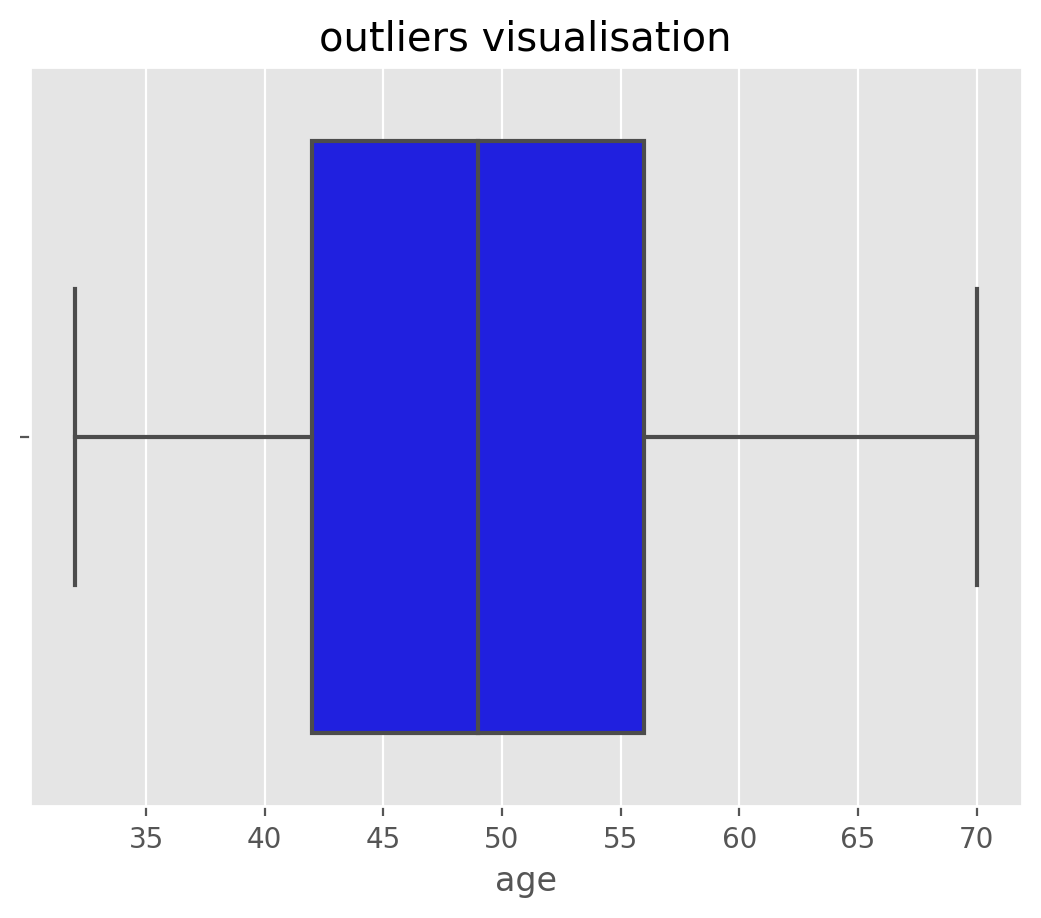

0       26.97
1       28.73
2       25.34
3       28.58
4       23.10
        ...  
4235    22.00
4236    19.16
4237    21.47
4238    25.60
4239    20.91
Name: BMI, Length: 4240, dtype: float64

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BMI'>

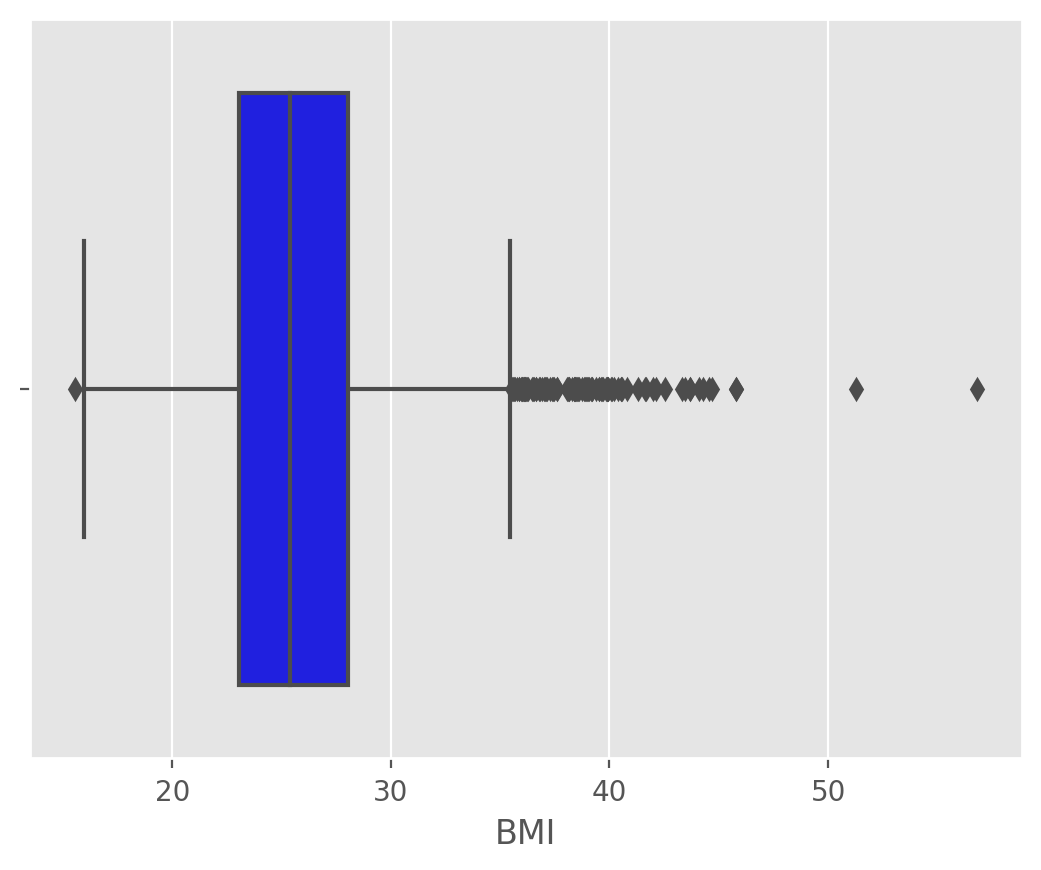

0       80.0
1       95.0
2       75.0
3       65.0
4       85.0
        ... 
4235    84.0
4236    86.0
4237    80.0
4238    67.0
4239    85.0
Name: heartRate, Length: 4240, dtype: float64

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='heartRate'>

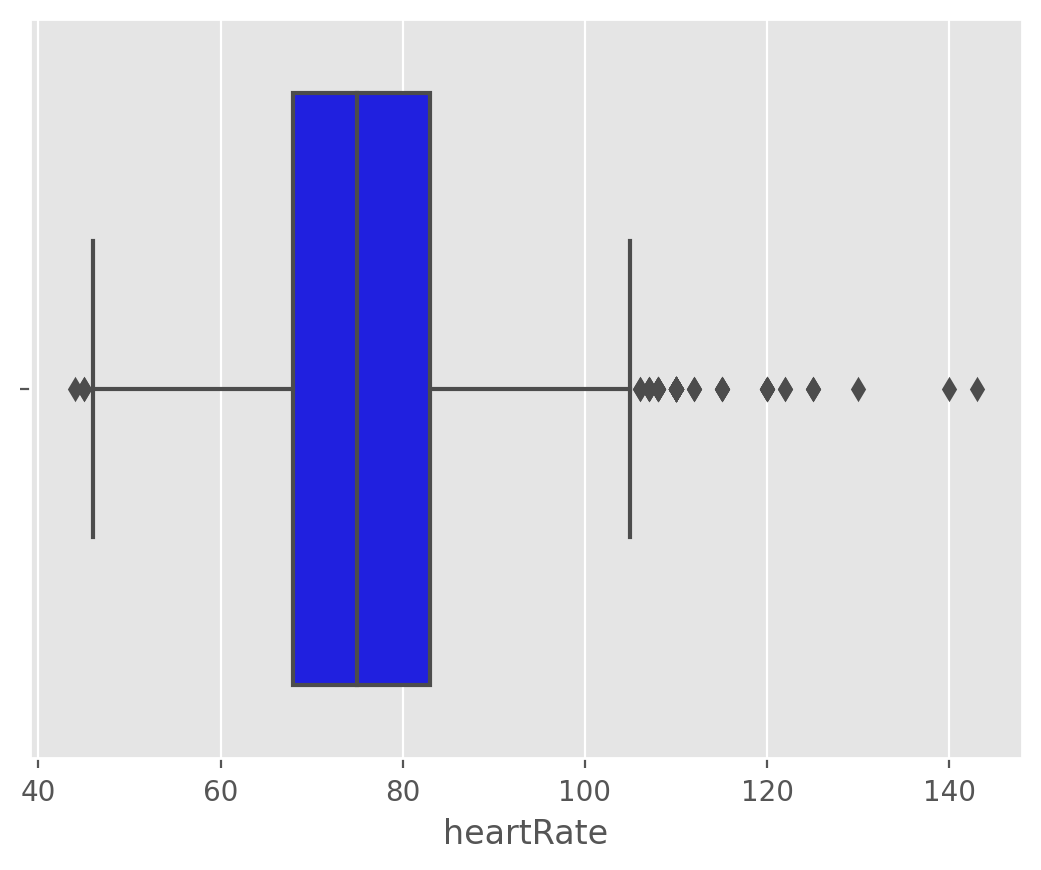

0        77.0
1        76.0
2        70.0
3       103.0
4        85.0
        ...  
4235     86.0
4236      NaN
4237    107.0
4238     72.0
4239     80.0
Name: glucose, Length: 4240, dtype: float64

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='glucose'>

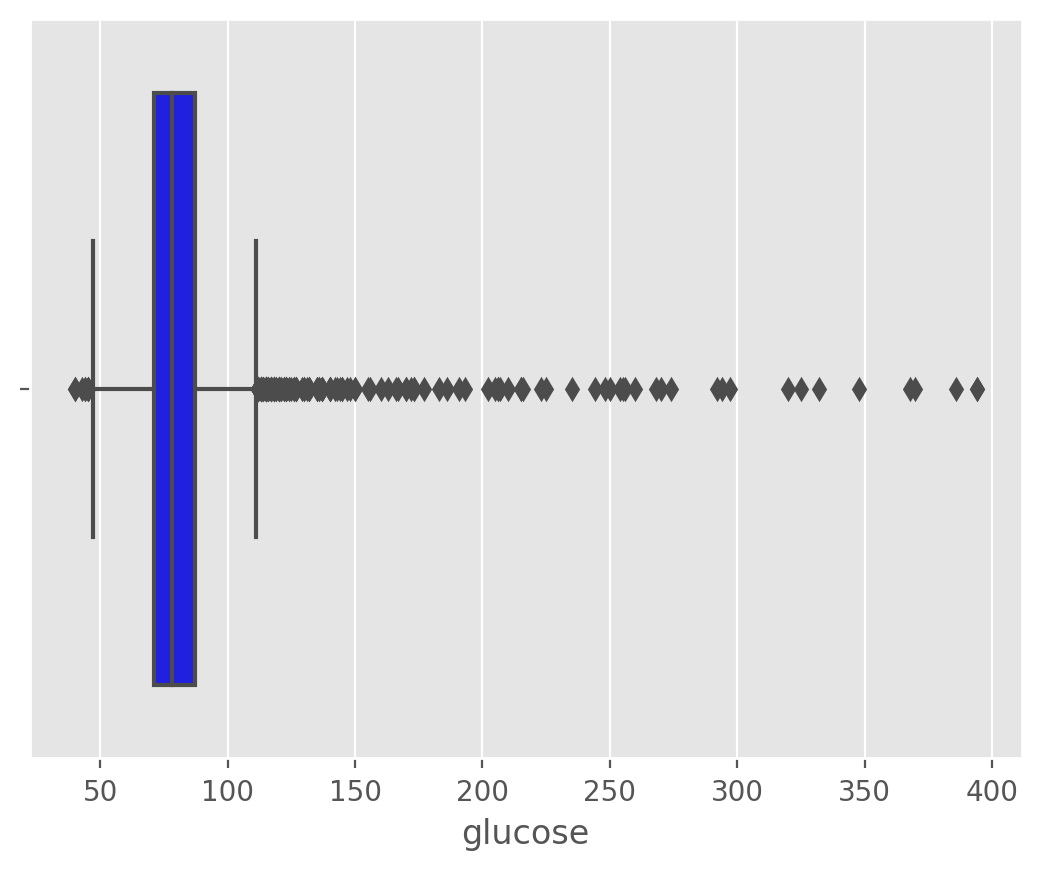

0       106.0
1       121.0
2       127.5
3       150.0
4       130.0
        ...  
4235    131.0
4236    126.5
4237    133.5
4238    141.0
4239    133.0
Name: sysBP, Length: 4240, dtype: float64

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sysBP'>

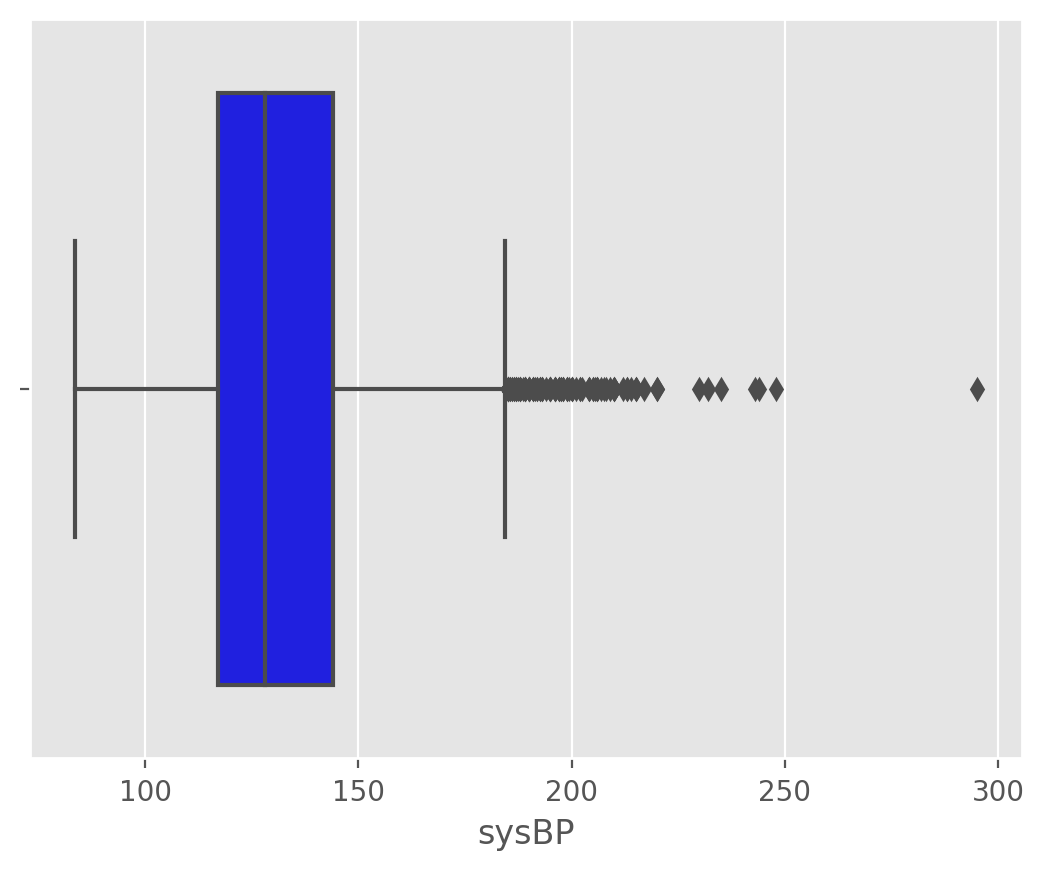

0       195.0
1       250.0
2       245.0
3       225.0
4       285.0
        ...  
4235    248.0
4236    210.0
4237    269.0
4238    185.0
4239    196.0
Name: totChol, Length: 4240, dtype: float64

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totChol'>

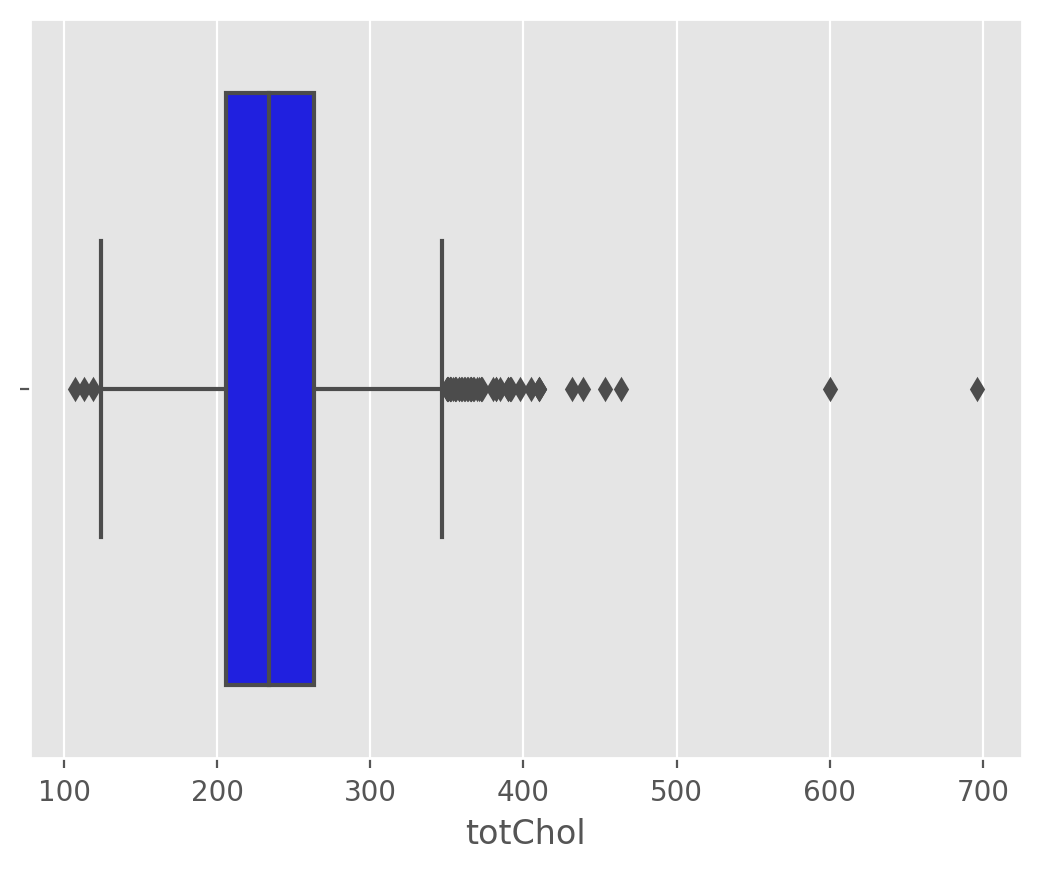

0       70.0
1       81.0
2       80.0
3       95.0
4       84.0
        ... 
4235    72.0
4236    87.0
4237    83.0
4238    98.0
4239    86.0
Name: diaBP, Length: 4240, dtype: float64

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diaBP'>

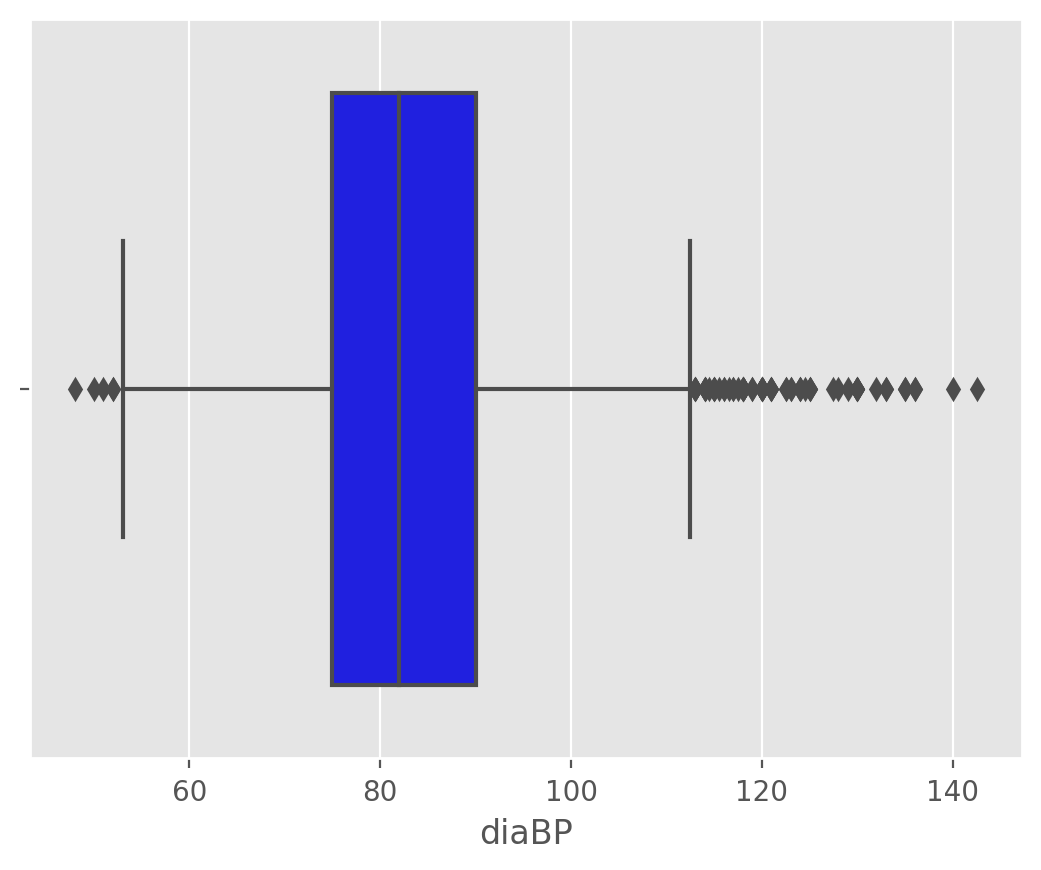

In [29]:
plt.title('outliers visualisation')
for i in clmns:
    fh[i]
    sns.boxplot(fh[i],color='blue')
    plt.show()

## Removing Outliers

In [31]:
from scipy import stats
import numpy as np
idx_lst = []
for i in clmns:
    l = np.abs(stats.zscore(fh[i]))
    idx_lst.extend(np.where(l>3)[0])

In [32]:
import numpy as np
fh_final = fh.loc[np.setdiff1d(fh.index.tolist(),idx_lst)].copy()

In [33]:
fh_final.shape

(4171, 16)

In [34]:
fh = fh.dropna()

In [35]:
fh.describe().T

count        mean        std     min     25%     50%  \
male             3658.0    0.443685   0.496886    0.00    0.00    0.00   
age              3658.0   49.551941   8.562029   32.00   42.00   49.00   
education        3658.0    1.980317   1.022656    1.00    1.00    2.00   
currentSmoker    3658.0    0.489065   0.499949    0.00    0.00    0.00   
cigsPerDay       3658.0    9.025424  11.921590    0.00    0.00    0.00   
BPMeds           3658.0    0.030344   0.171557    0.00    0.00    0.00   
prevalentStroke  3658.0    0.005741   0.075561    0.00    0.00    0.00   
prevalentHyp     3658.0    0.311646   0.463229    0.00    0.00    0.00   
diabetes         3658.0    0.027064   0.162292    0.00    0.00    0.00   
totChol          3658.0  236.847731  44.097681  113.00  206.00  234.00   
sysBP            3658.0  132.370558  22.086866   83.50  117.00  128.00   
diaBP            3658.0   82.917031  11.974258   48.00   75.00   82.00   
BMI              3658.0   25.782802   4.065601   15.54   23.08   25.38   
heartRate        3658.0   75.730727  11.981525   44.00   68.00   75.00   
glucose          3658.0   81.852925  23.904164   40.00   71.00   78.00   
TenYearCHD       3658.0    0.152269   0.359331    0.00    0.00    0.00   

                      75%    max  
male               1.0000    1.0  
age               56.0000   70.0  
education          3.0000    4.0  
currentSmoker      1.0000    1.0  
cigsPerDay        20.0000   70.0  
BPMeds             0.0000    1.0  
prevalentStroke    0.0000    1.0  
prevalentHyp       1.0000    1.0  
diabetes           0.0000    1.0  
totChol          263.0000  600.0  
sysBP            143.8750  295.0  
diaBP             90.0000  142.5  
BMI               28.0375   56.8  
heartRate         82.0000  143.0  
glucose           87.0000  394.0  
TenYearCHD         0.0000    1.0

In [36]:
fh.isna().sum().sum()

0

After Null VAlue treatement and removing all the outliers, we can see that there are no null values.

## EDA

Data Distribution's Checking

/var/folders/v2/l6fcc6q118lff6tf6r104_kc0000gn/T/ipykernel_8158/3194578133.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  fh.hist(ax = ax)


array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

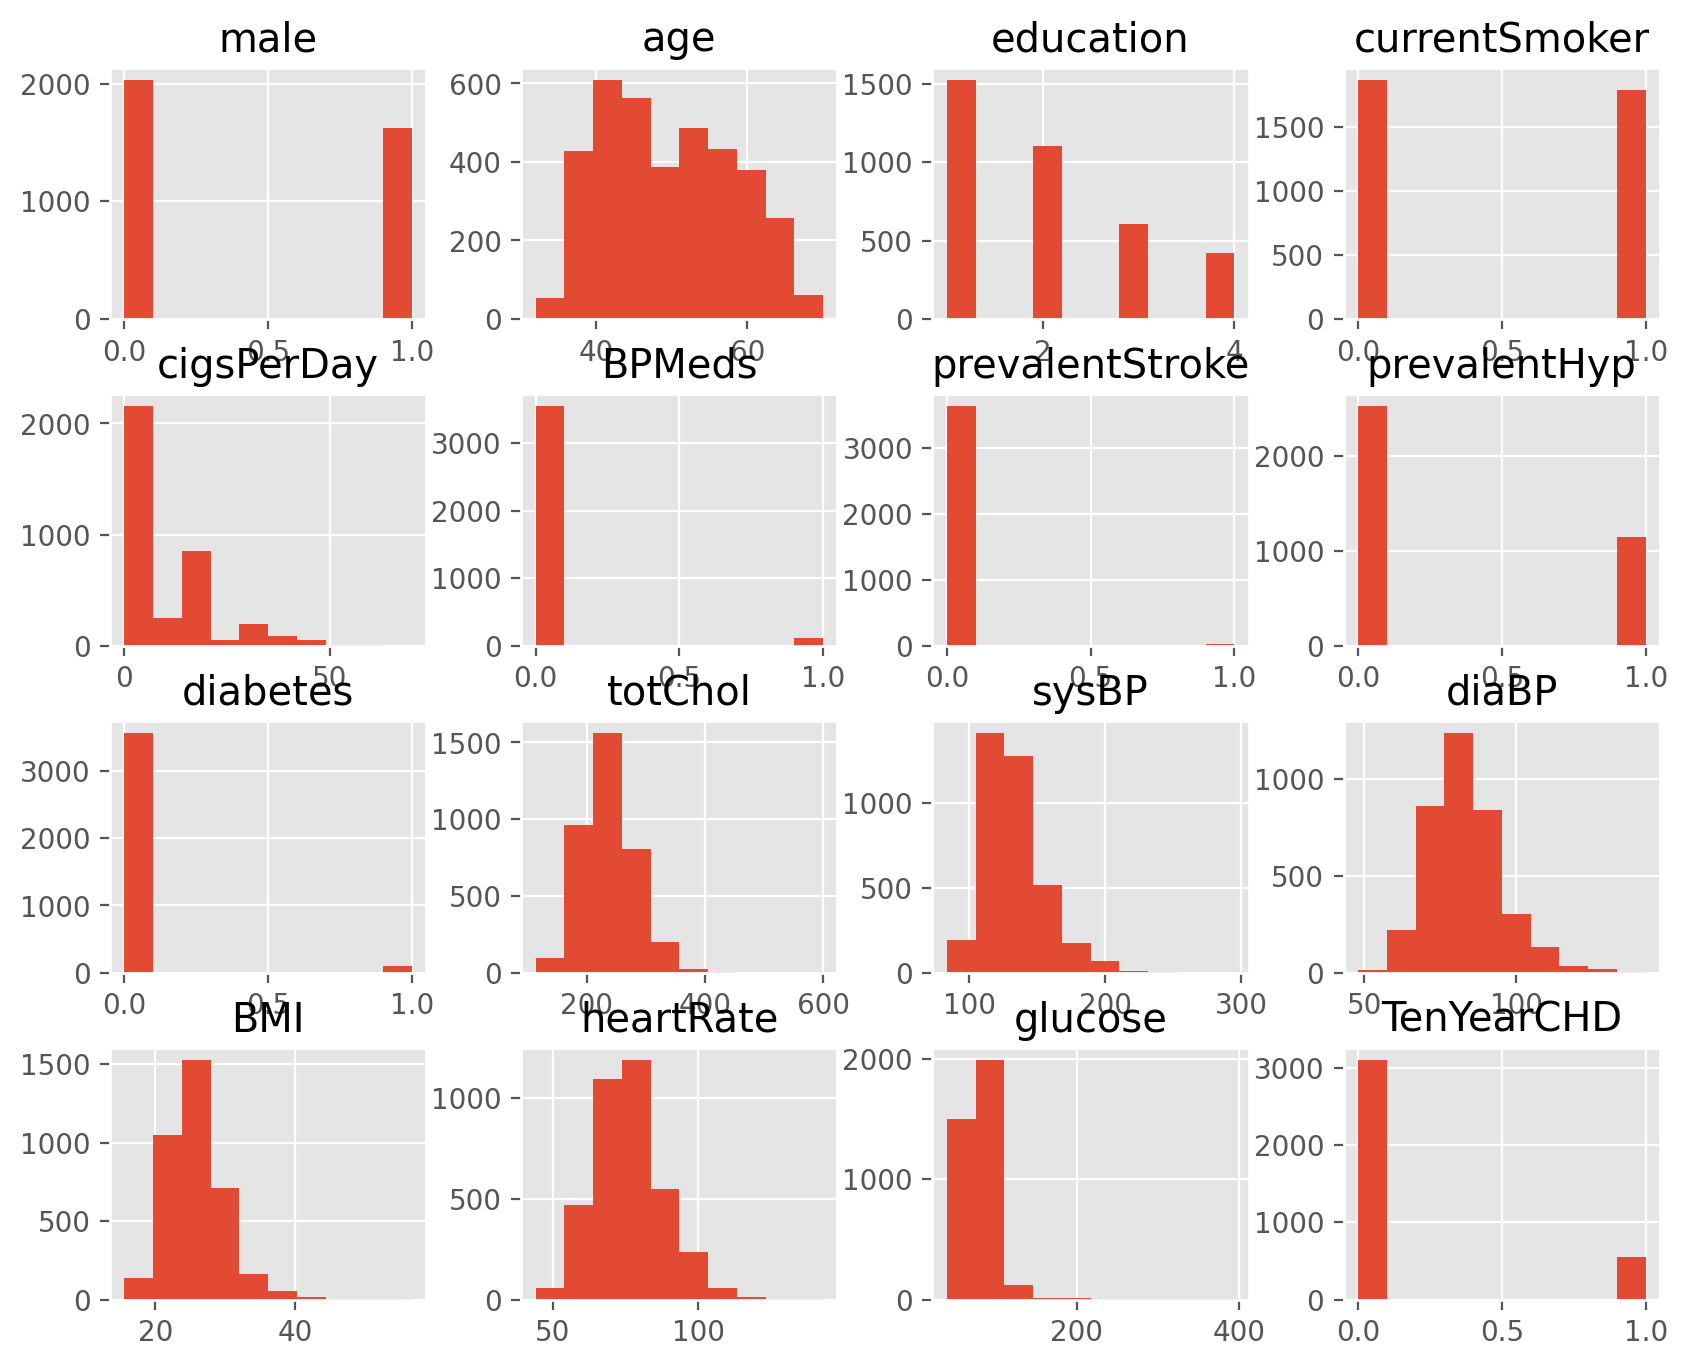

In [39]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
fh.hist(ax = ax)
plt.show()

OBSERVATIONS

Few coloumns like, BPMeds, PrevalentHyp, glucose, diabetes, and cigsPerDay are skewed

## Univariate Analysis

In [40]:
fh.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

plotting between male  and tenyearCHD 


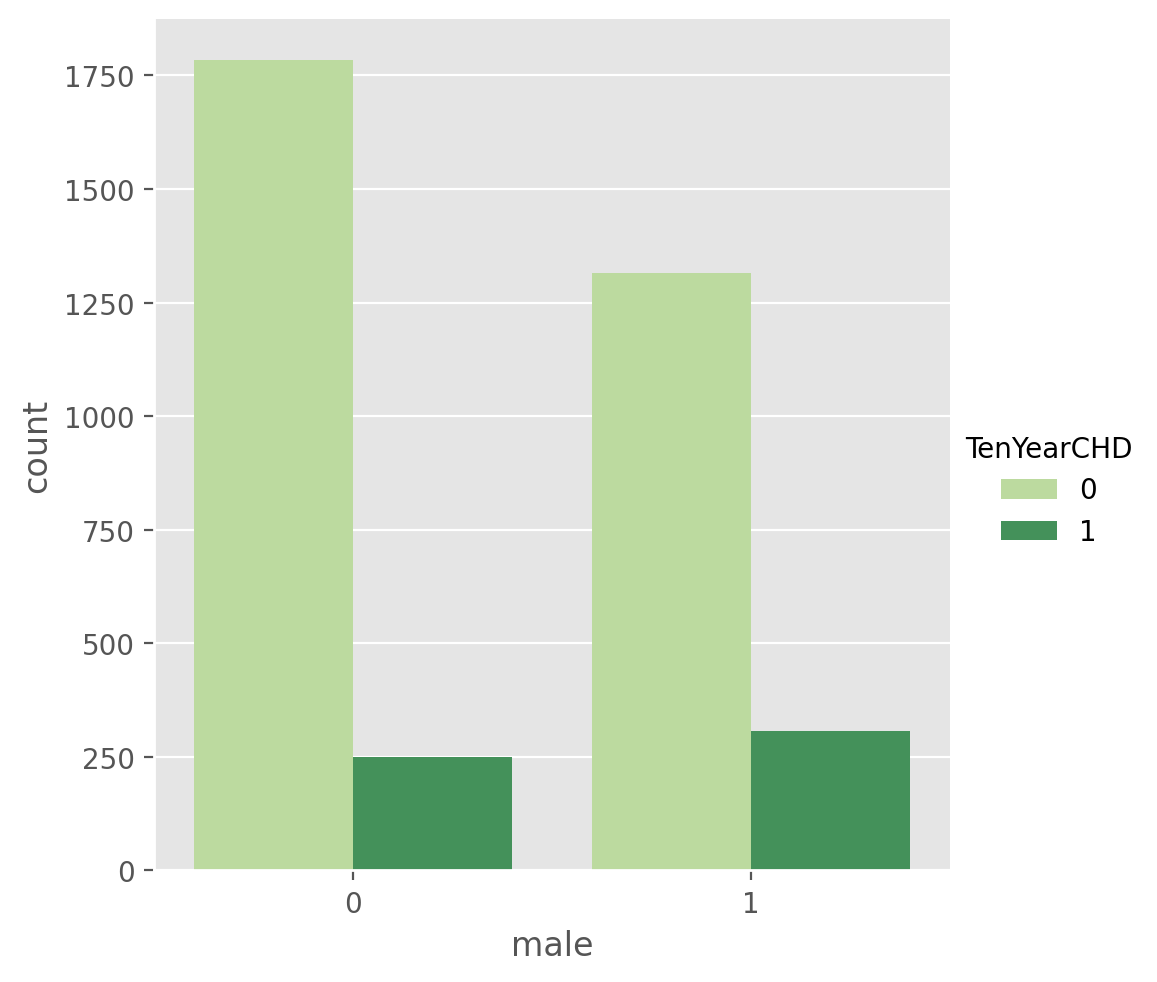

plotting between education  and tenyearCHD 


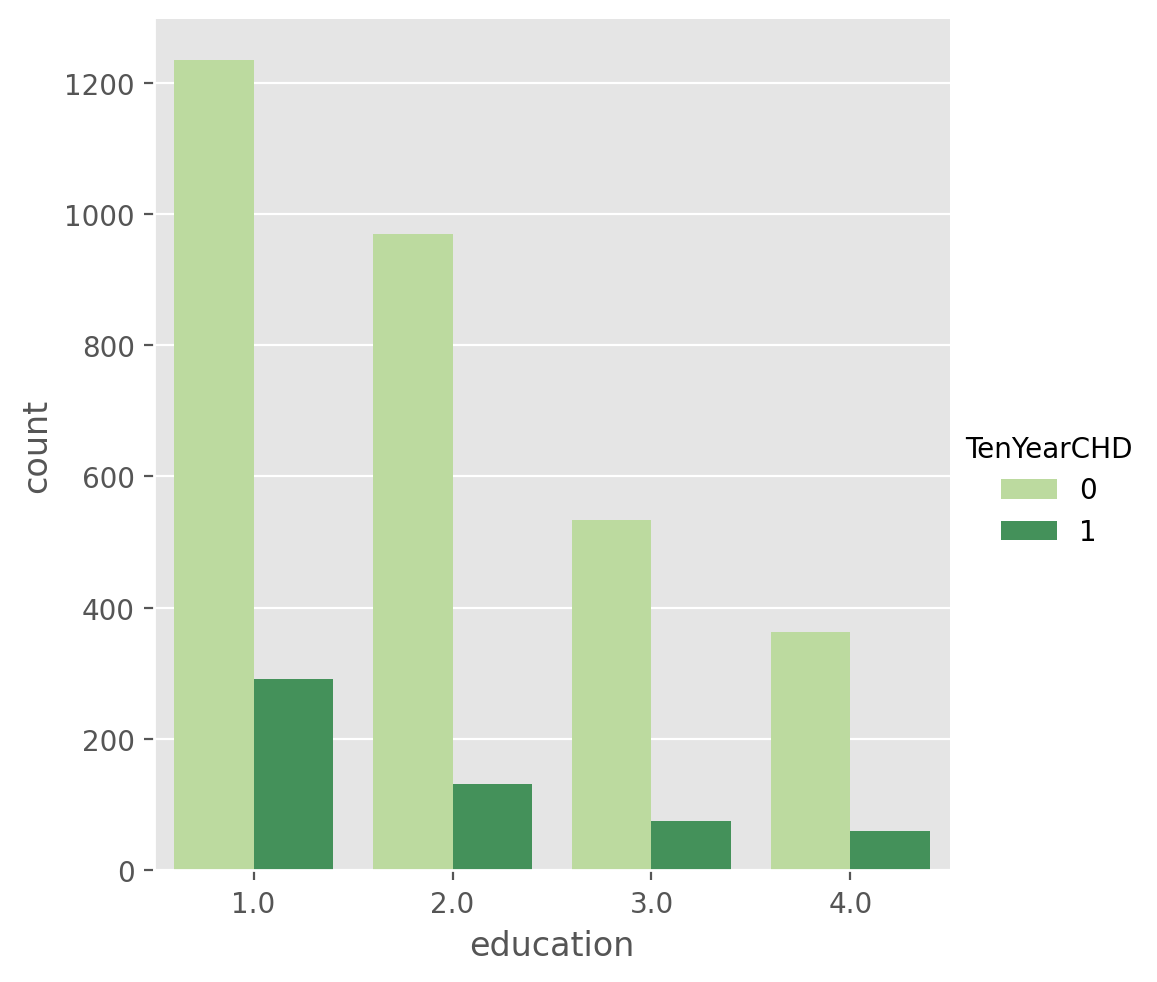

plotting between currentSmoker  and tenyearCHD 


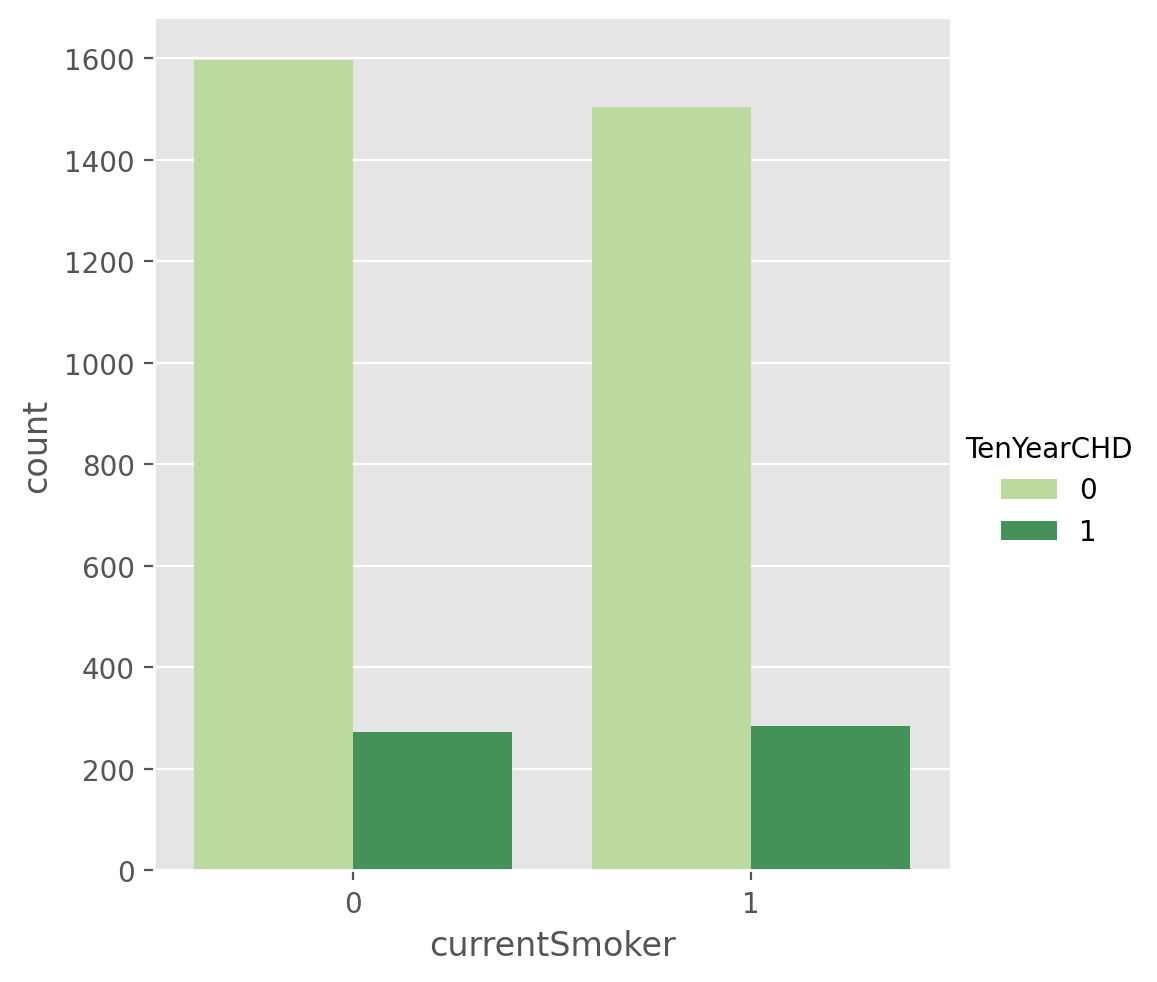

plotting between BPMeds  and tenyearCHD 


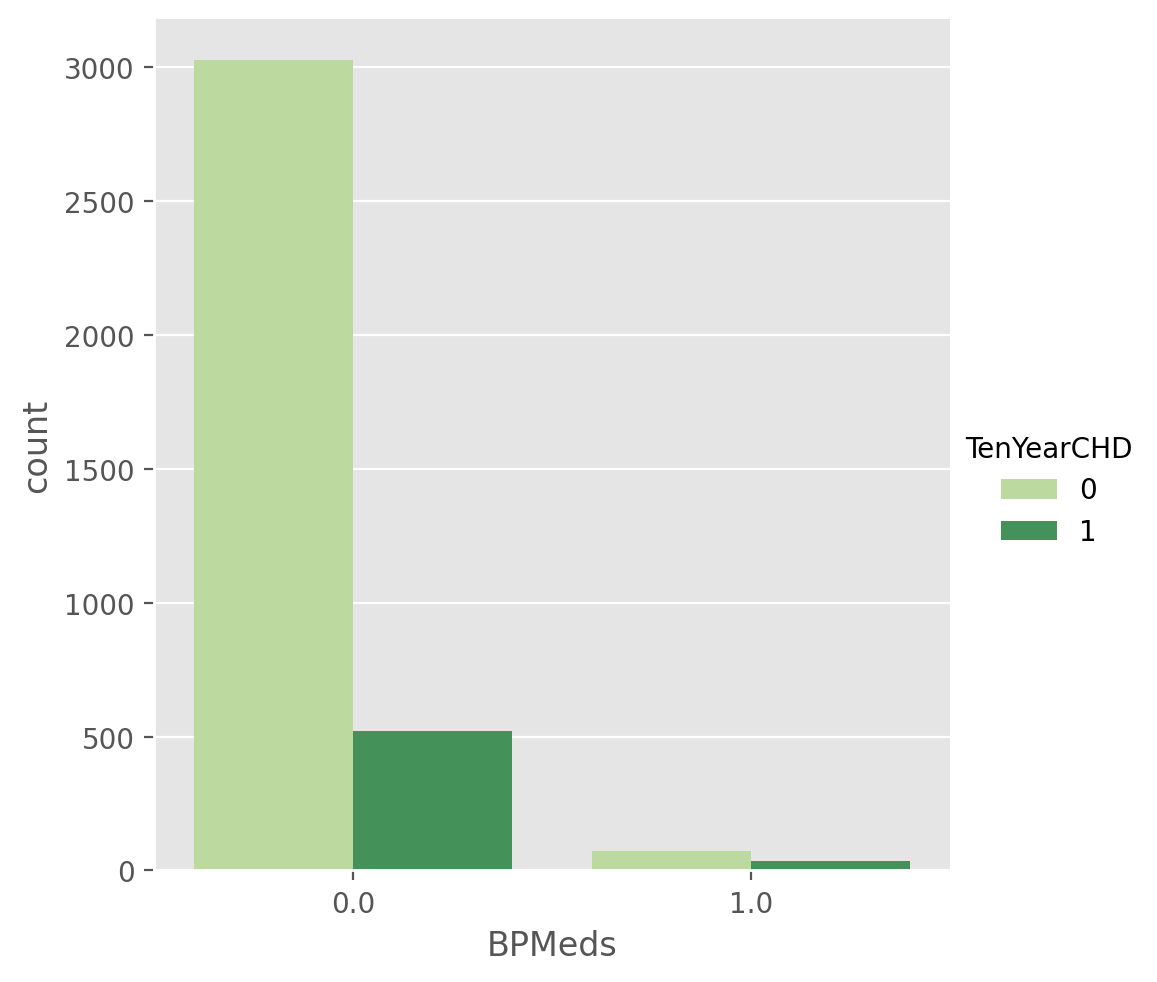

plotting between prevalentStroke  and tenyearCHD 


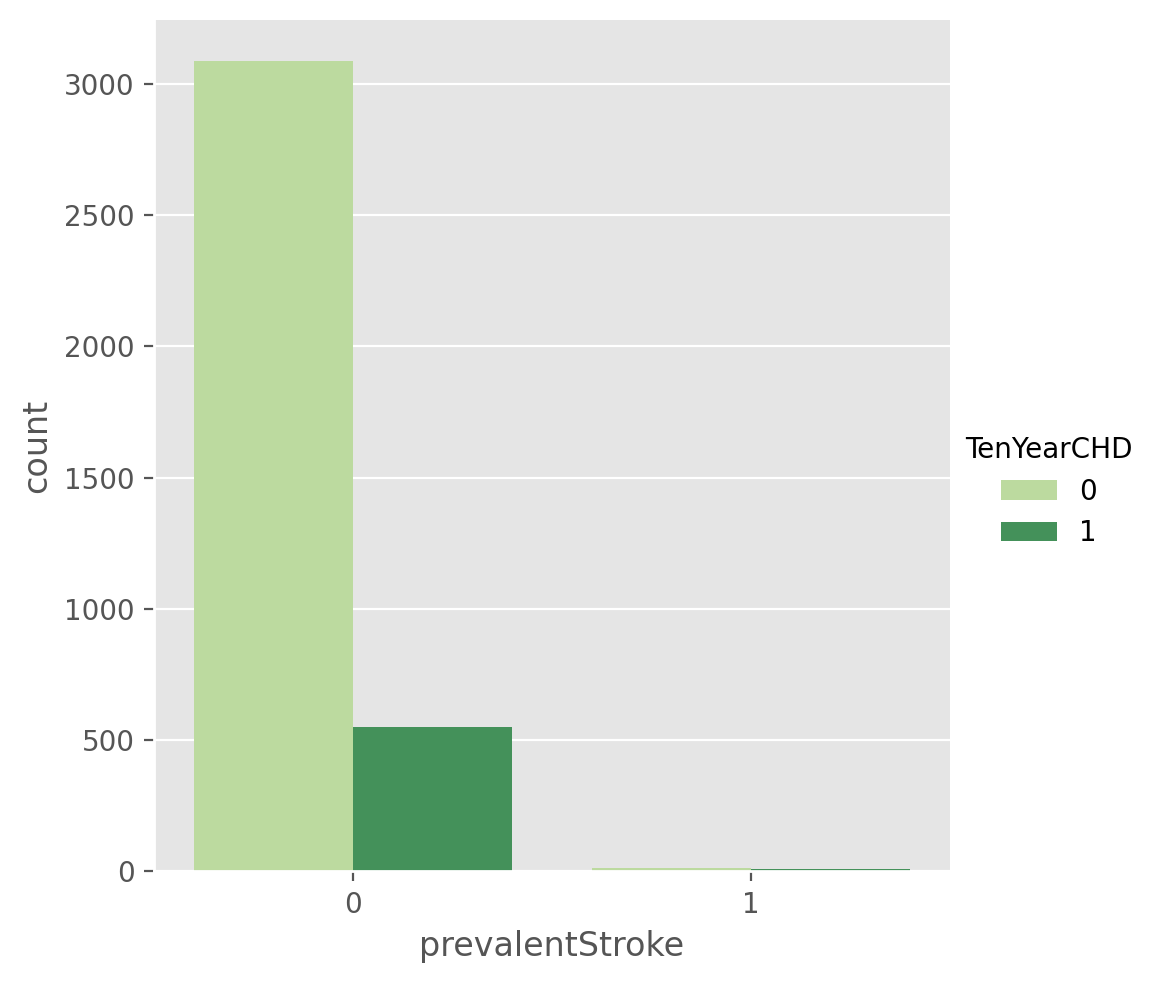

plotting between prevalentHyp  and tenyearCHD 


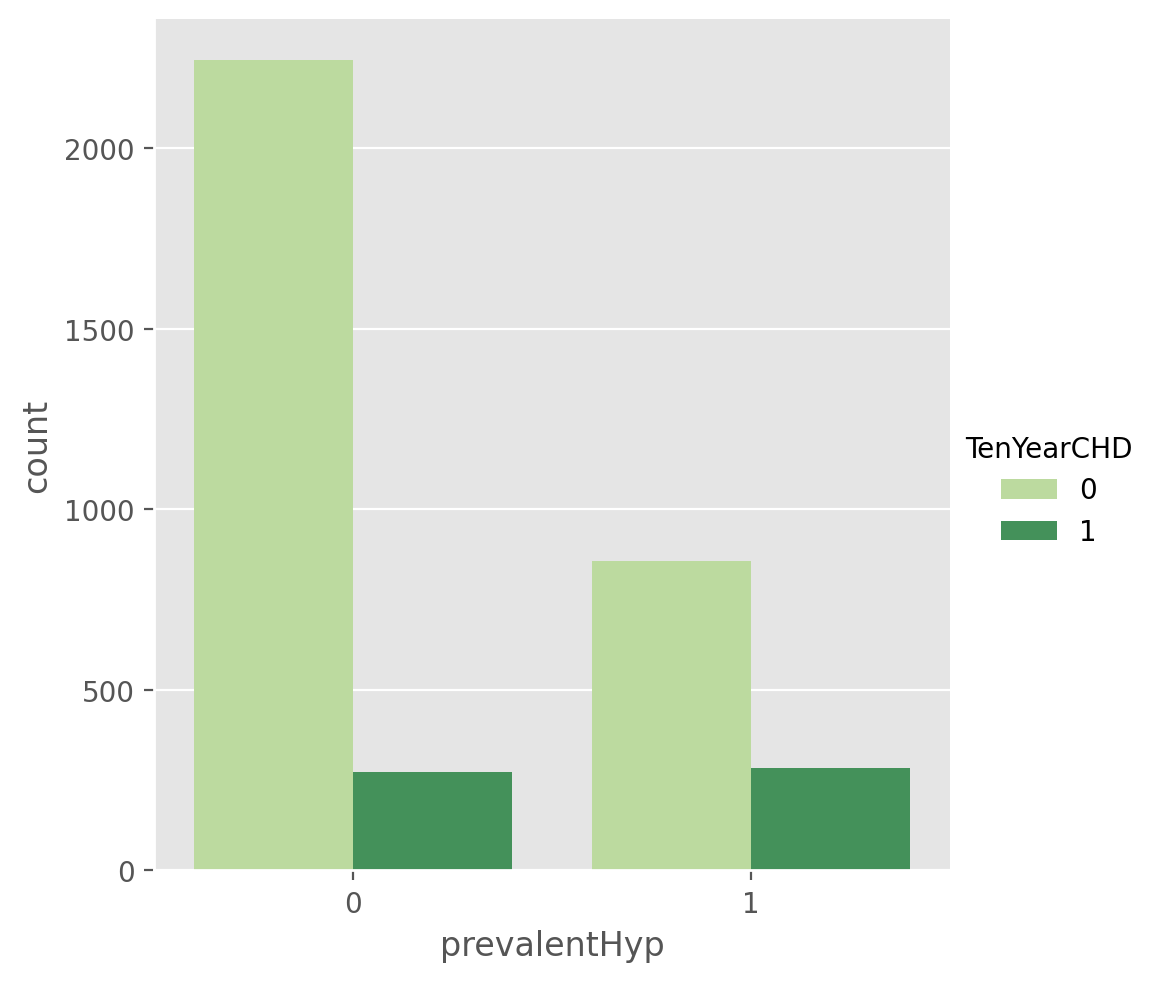

plotting between diabetes  and tenyearCHD 


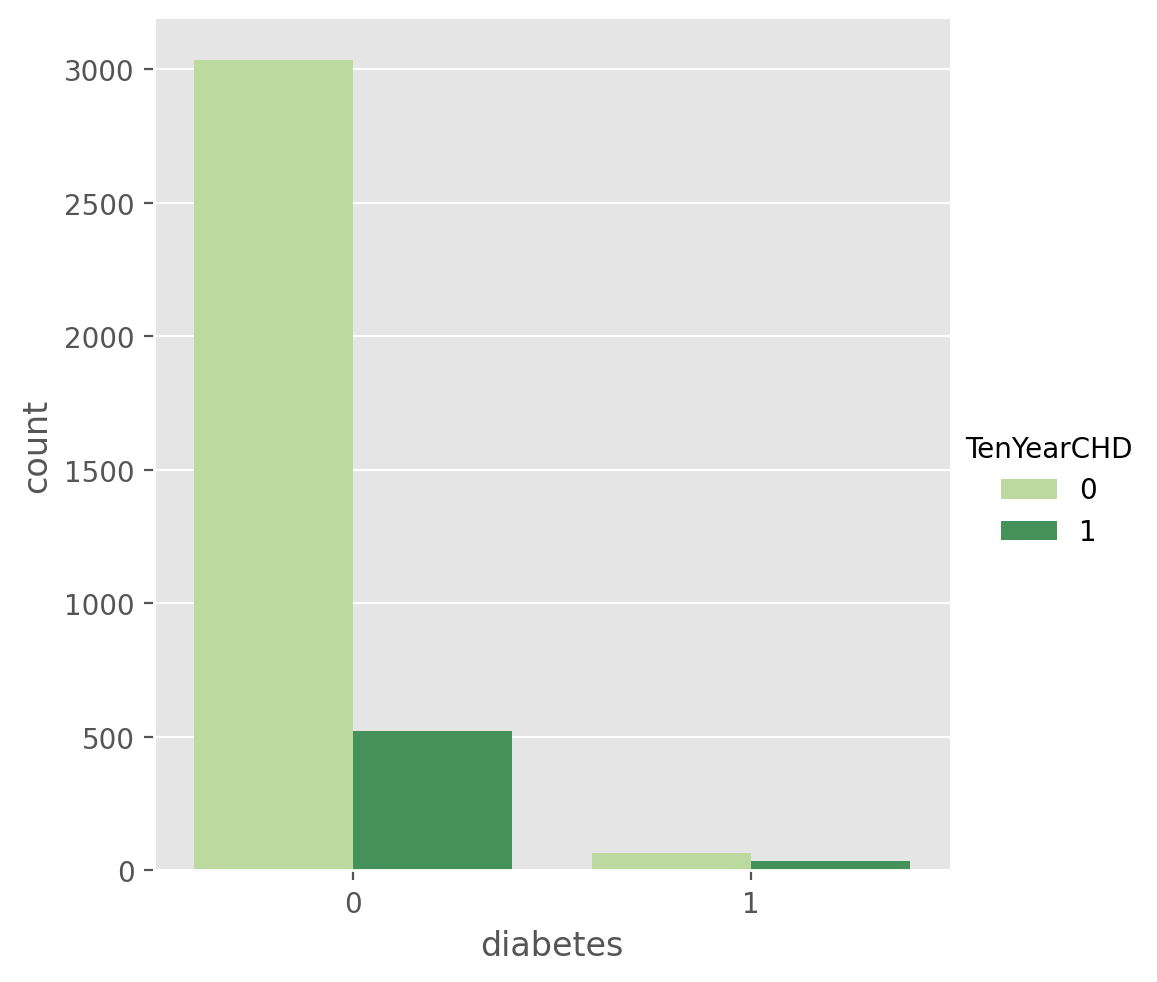

In [41]:
clmn_c = ['male','education','currentSmoker','BPMeds','prevalentStroke','prevalentHyp','diabetes']
for i in clmn_c:
    print('plotting between',i,' and tenyearCHD ')
    sns.catplot(x=i, hue= 'TenYearCHD',kind='count',data=fh,palette='YlGn')
    plt.show()

OBSERVATIONS

BPMeds, PrevalentStroke, Diabetes are the coloumns where there are almost unequal number of data points present, hence these can be removed from the modeling

Text(0.5, 1.0, 'Age vs TenYearCHD')

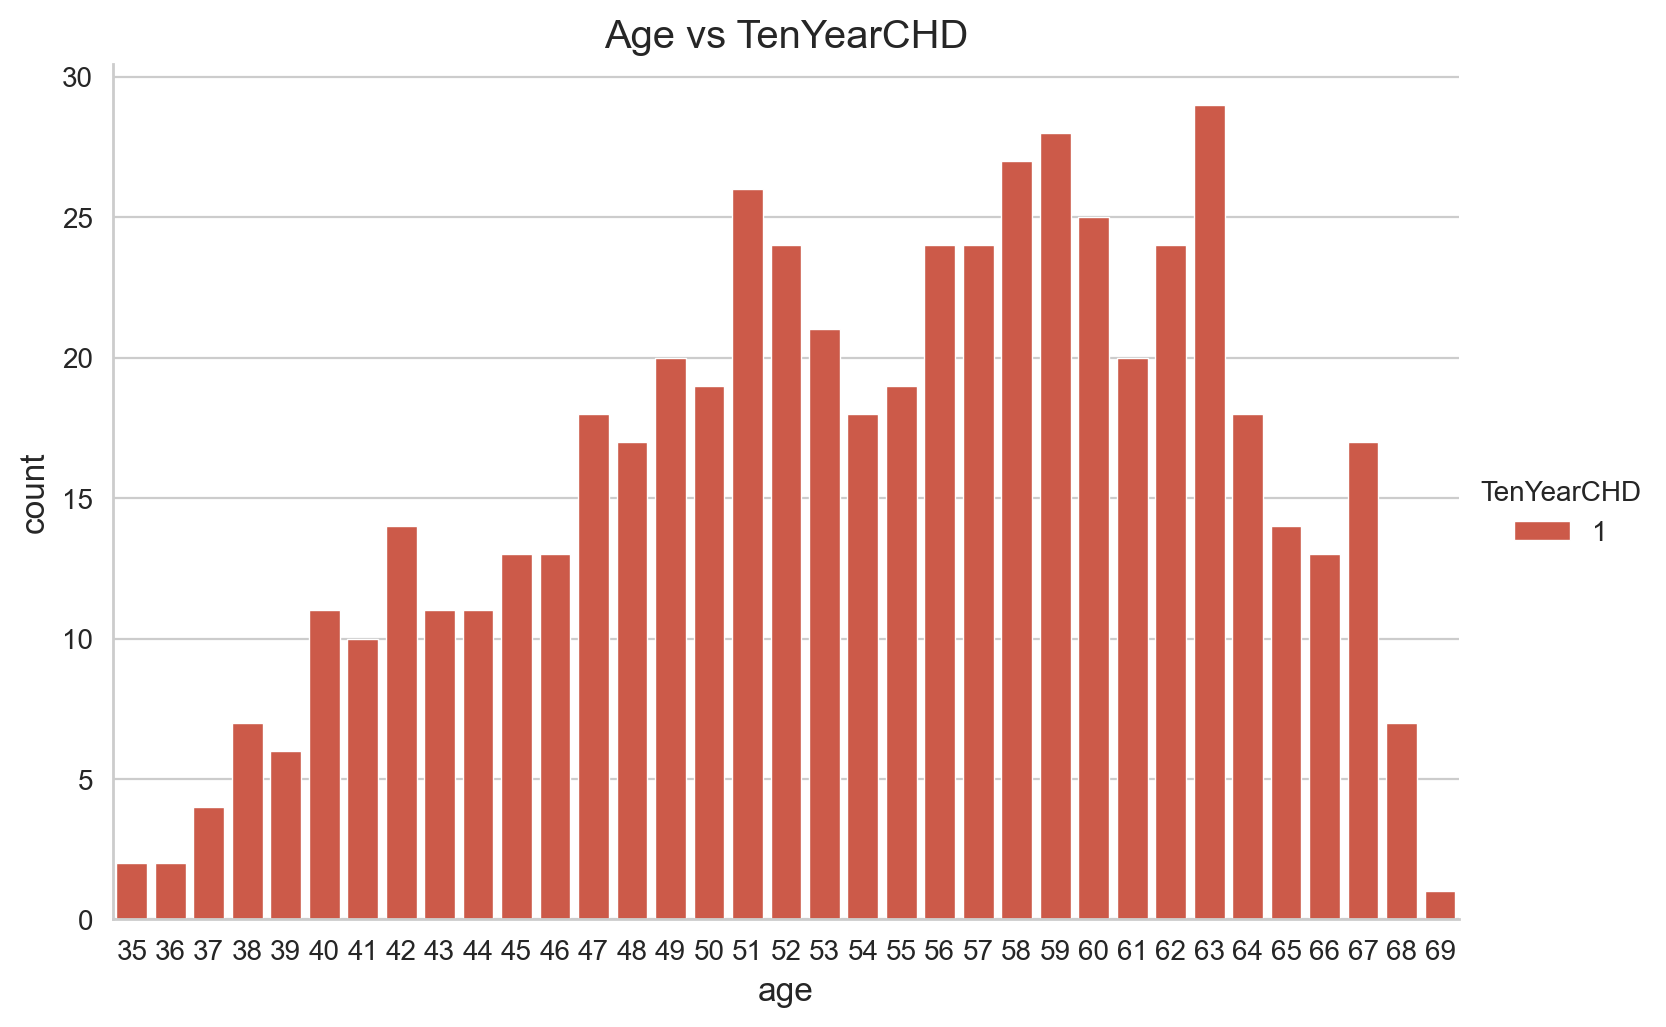

In [42]:
%matplotlib inline
sns.set_style('whitegrid')
sns.catplot(x='age',kind='count',hue='TenYearCHD',aspect=15/10,data=fh.loc[lambda la:la.TenYearCHD==1])
plt.title('Age vs TenYearCHD')
plt.show()

OBSERVATIONS

With increase in age the chance of having CHD in the person increases

In [43]:
fh['cigsPerDay']=fh['cigsPerDay'].astype(int)

<BarContainer object of 33 artists>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '23'),
 Text(22, 0, '25'),
 Text(23, 0, '29'),
 Text(24, 0, '30'),
 Text(25, 0, '35'),
 Text(26, 0, '38'),
 Text(27, 0, '40'),
 Text(28, 0, '43'),
 Text(29, 0, '45'),
 Text(30, 0, '50'),
 Text(31, 0, '60'),
 Text(32, 0, '70')]

Text(0.5, 0, 'cigs per day')

Text(0, 0.5, 'percentage of people with chd')

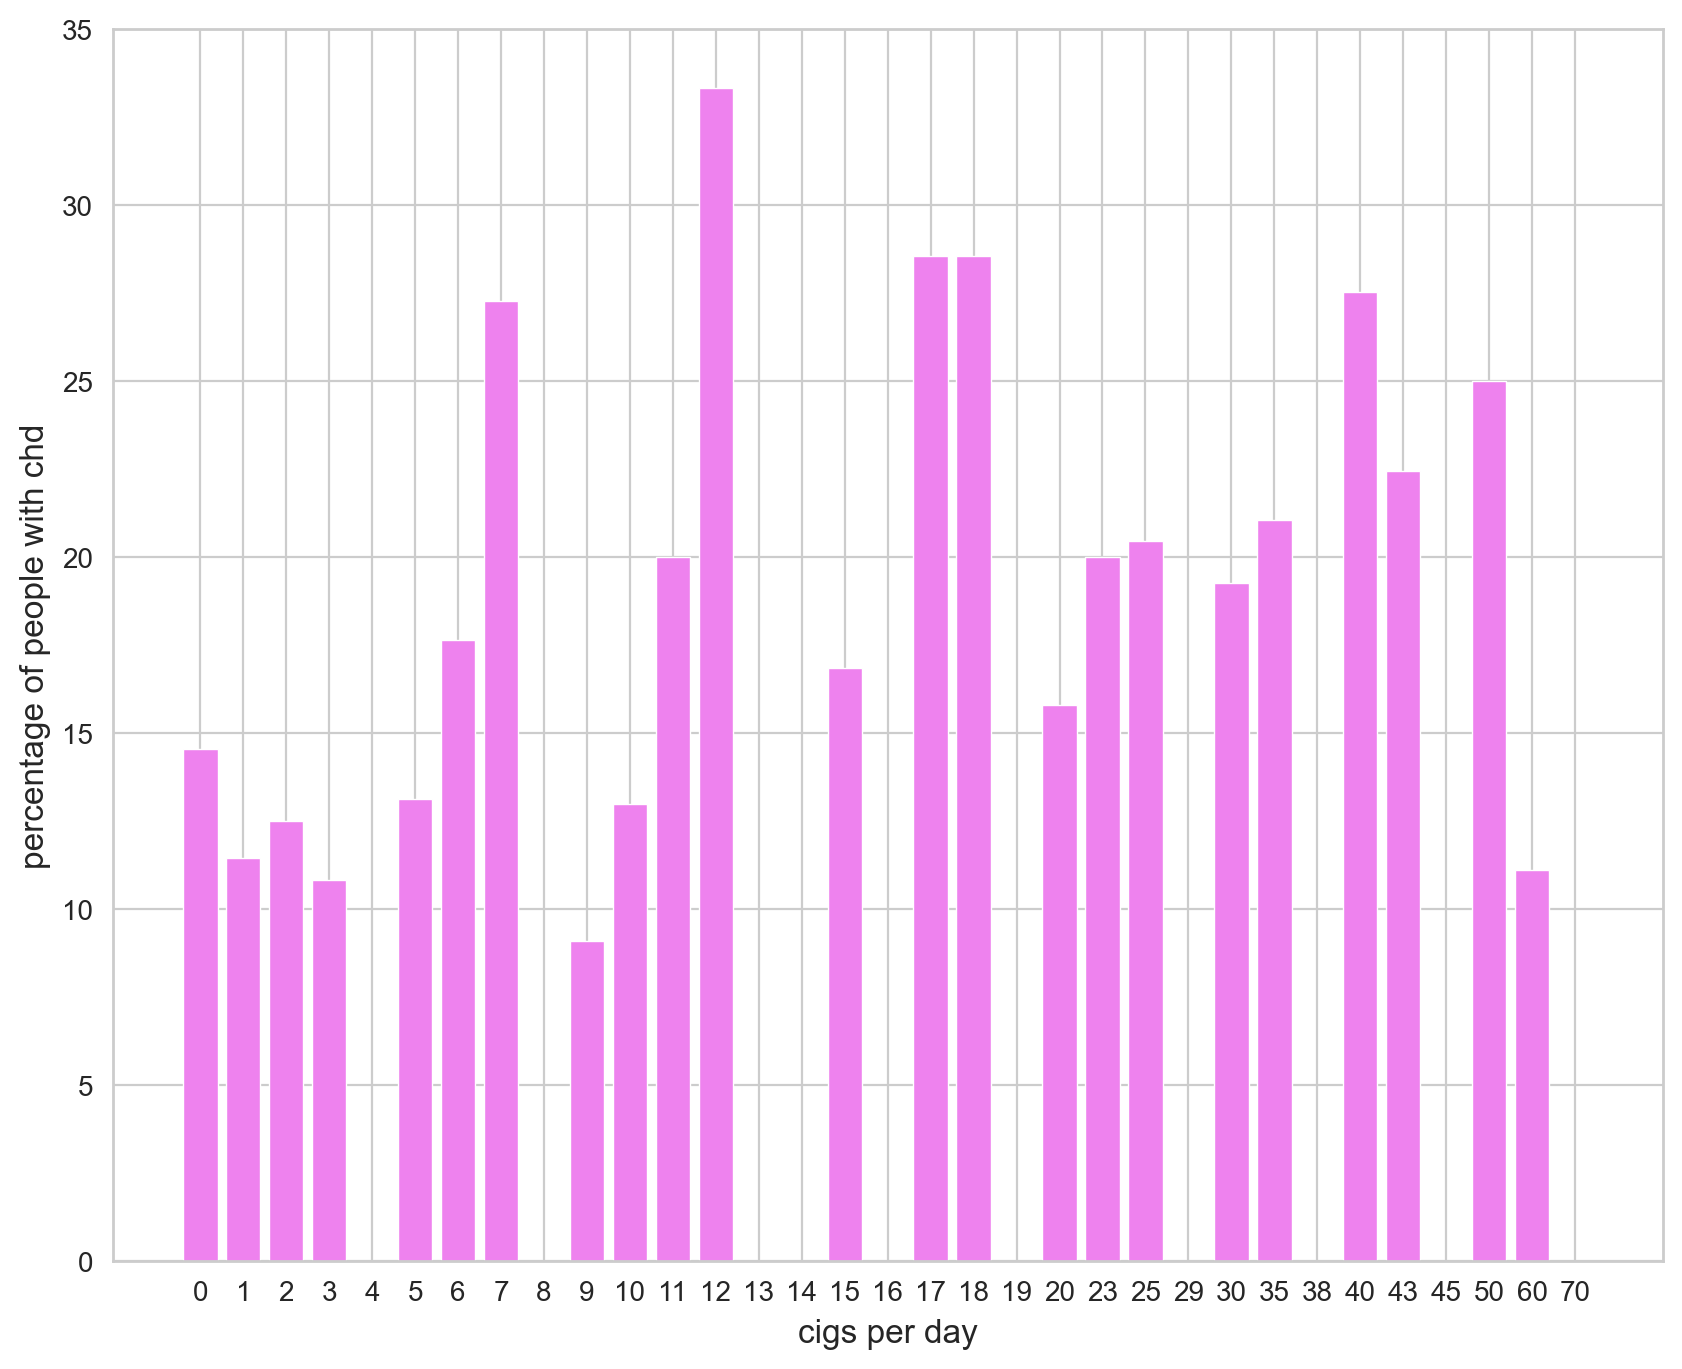

In [44]:
fig, ax=plt.subplots(nrows=1,ncols=1,figsize=(10,8),facecolor='white')
dist = fh['cigsPerDay'].value_counts()
cigs = [int(x) for x in sorted(dist.index)]
chd_count=dict(map(lambda x:[x,0],cigs))
for t,c in zip(fh['TenYearCHD'],fh['cigsPerDay']):
    chd_count[c]+=t
rates=[(chd_count[c]/float(dist.loc[c]))*100 for c in cigs]
x=np.arange(len(cigs))
ax.bar(x,rates,color='violet')
ax.set_xticks(x)
ax.set_xticklabels(cigs)
ax.set_xlabel('cigs per day')
ax.set_ylabel('percentage of people with chd')
plt.show()


## Numerical Column Analysis

plot between  totChol and TenYearsCHD


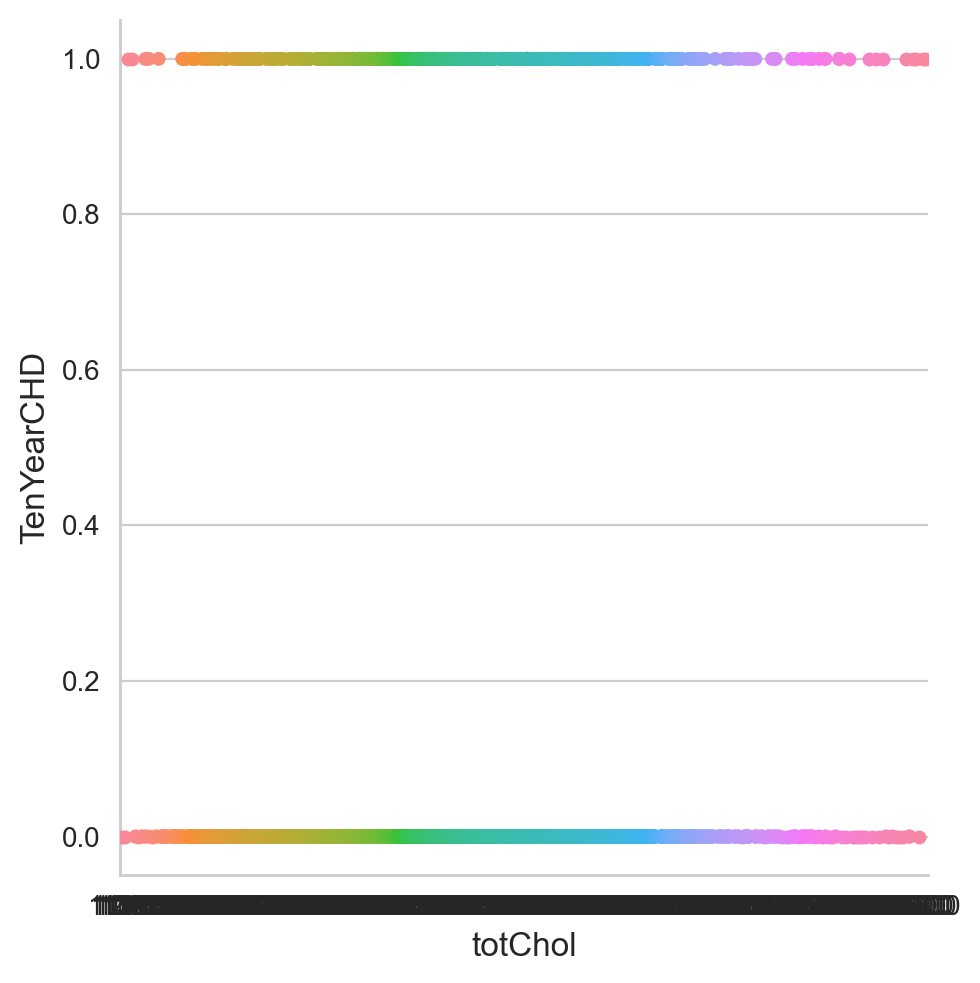

plot between  sysBP and TenYearsCHD


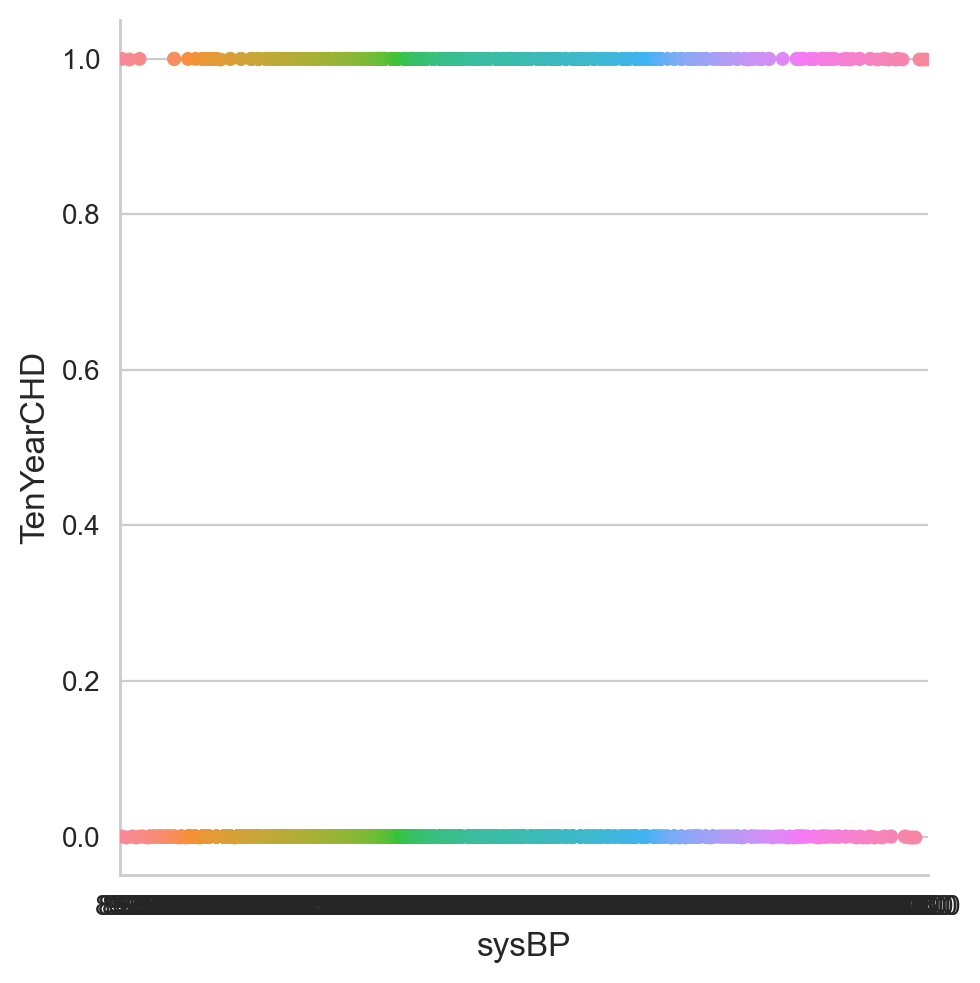

plot between  diaBP and TenYearsCHD


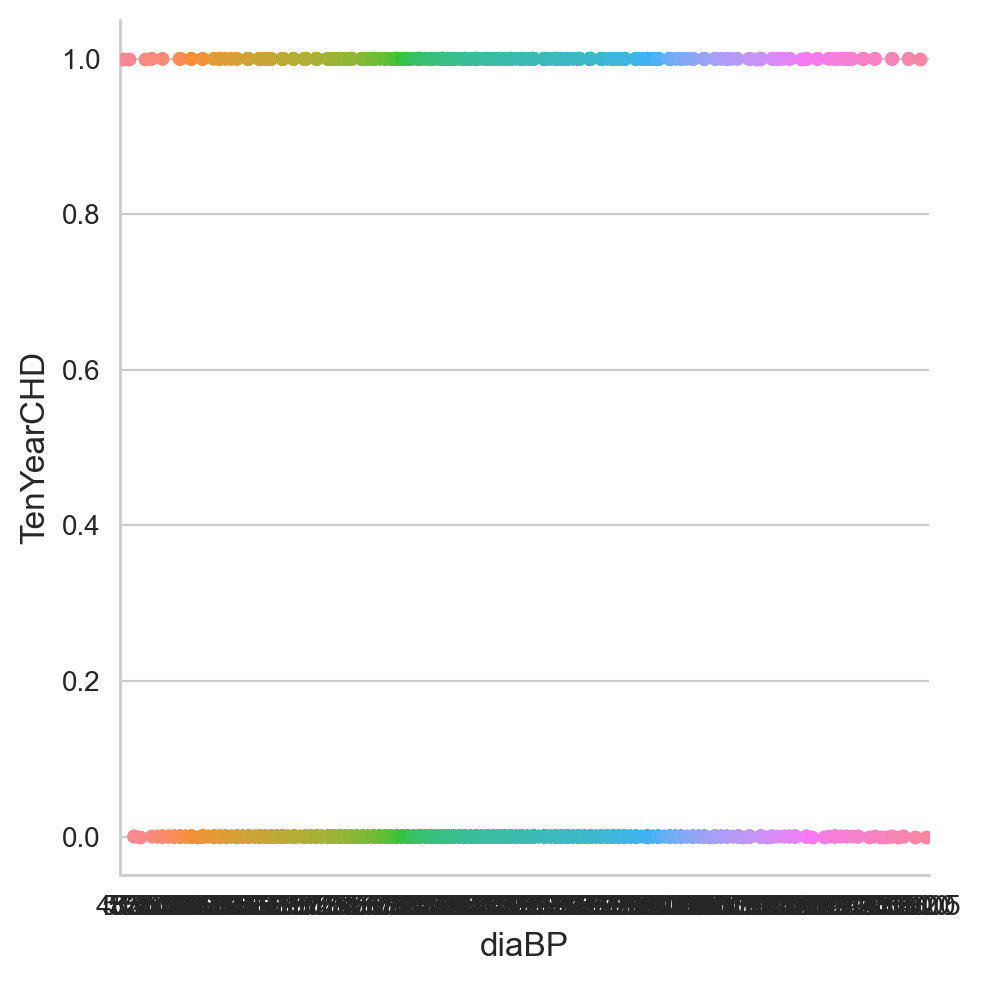

plot between  heartRate and TenYearsCHD


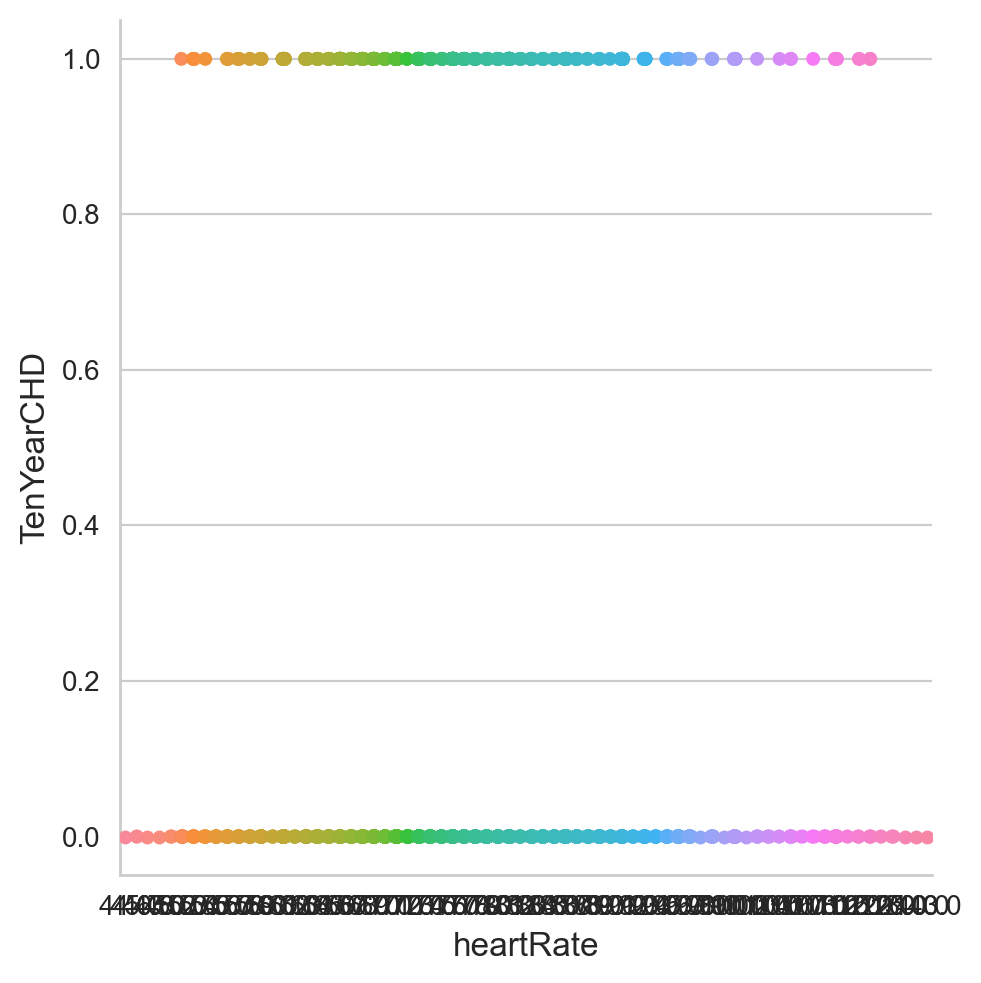

plot between  glucose and TenYearsCHD


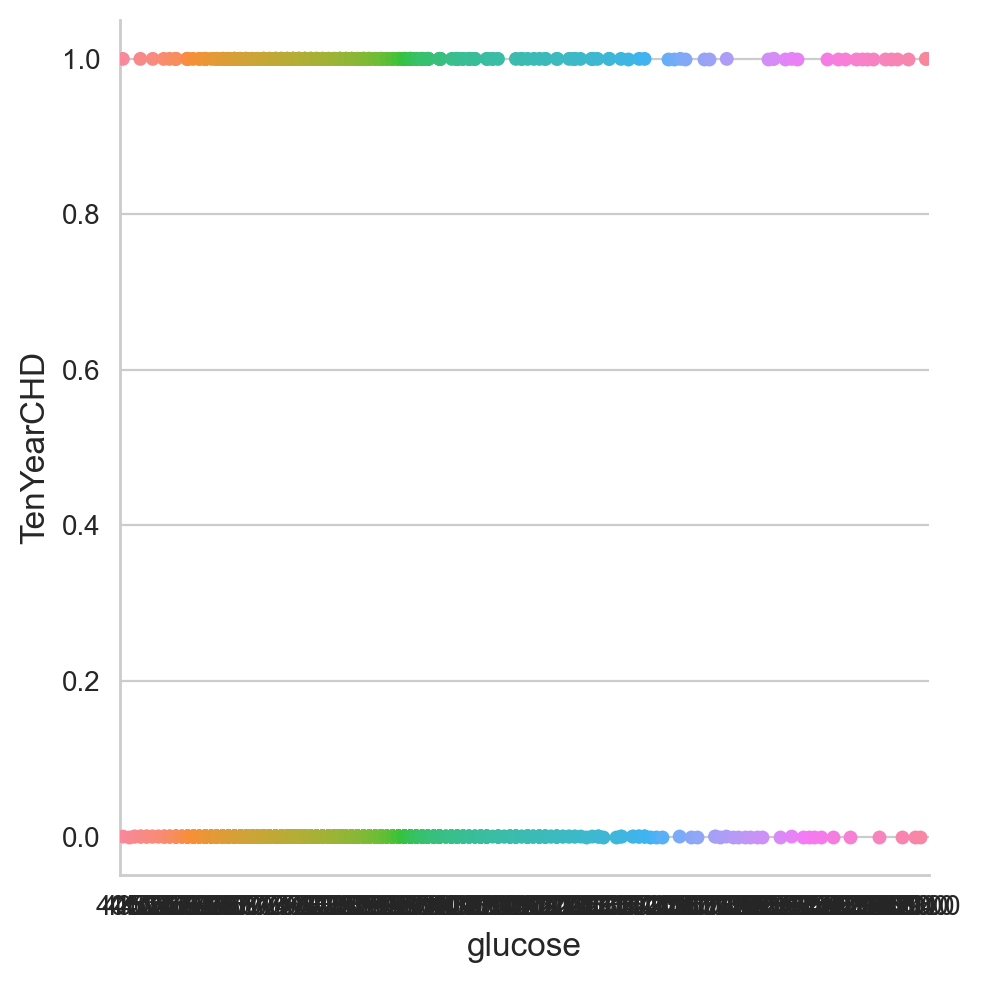

In [45]:
num_clmns = ['totChol','sysBP','diaBP','heartRate','glucose']
for i in num_clmns:
    print('plot between ',i,'and TenYearsCHD')
    sns.catplot(x=i,y='TenYearCHD',data=fh)
    plt.show()

## Bivariate analysis

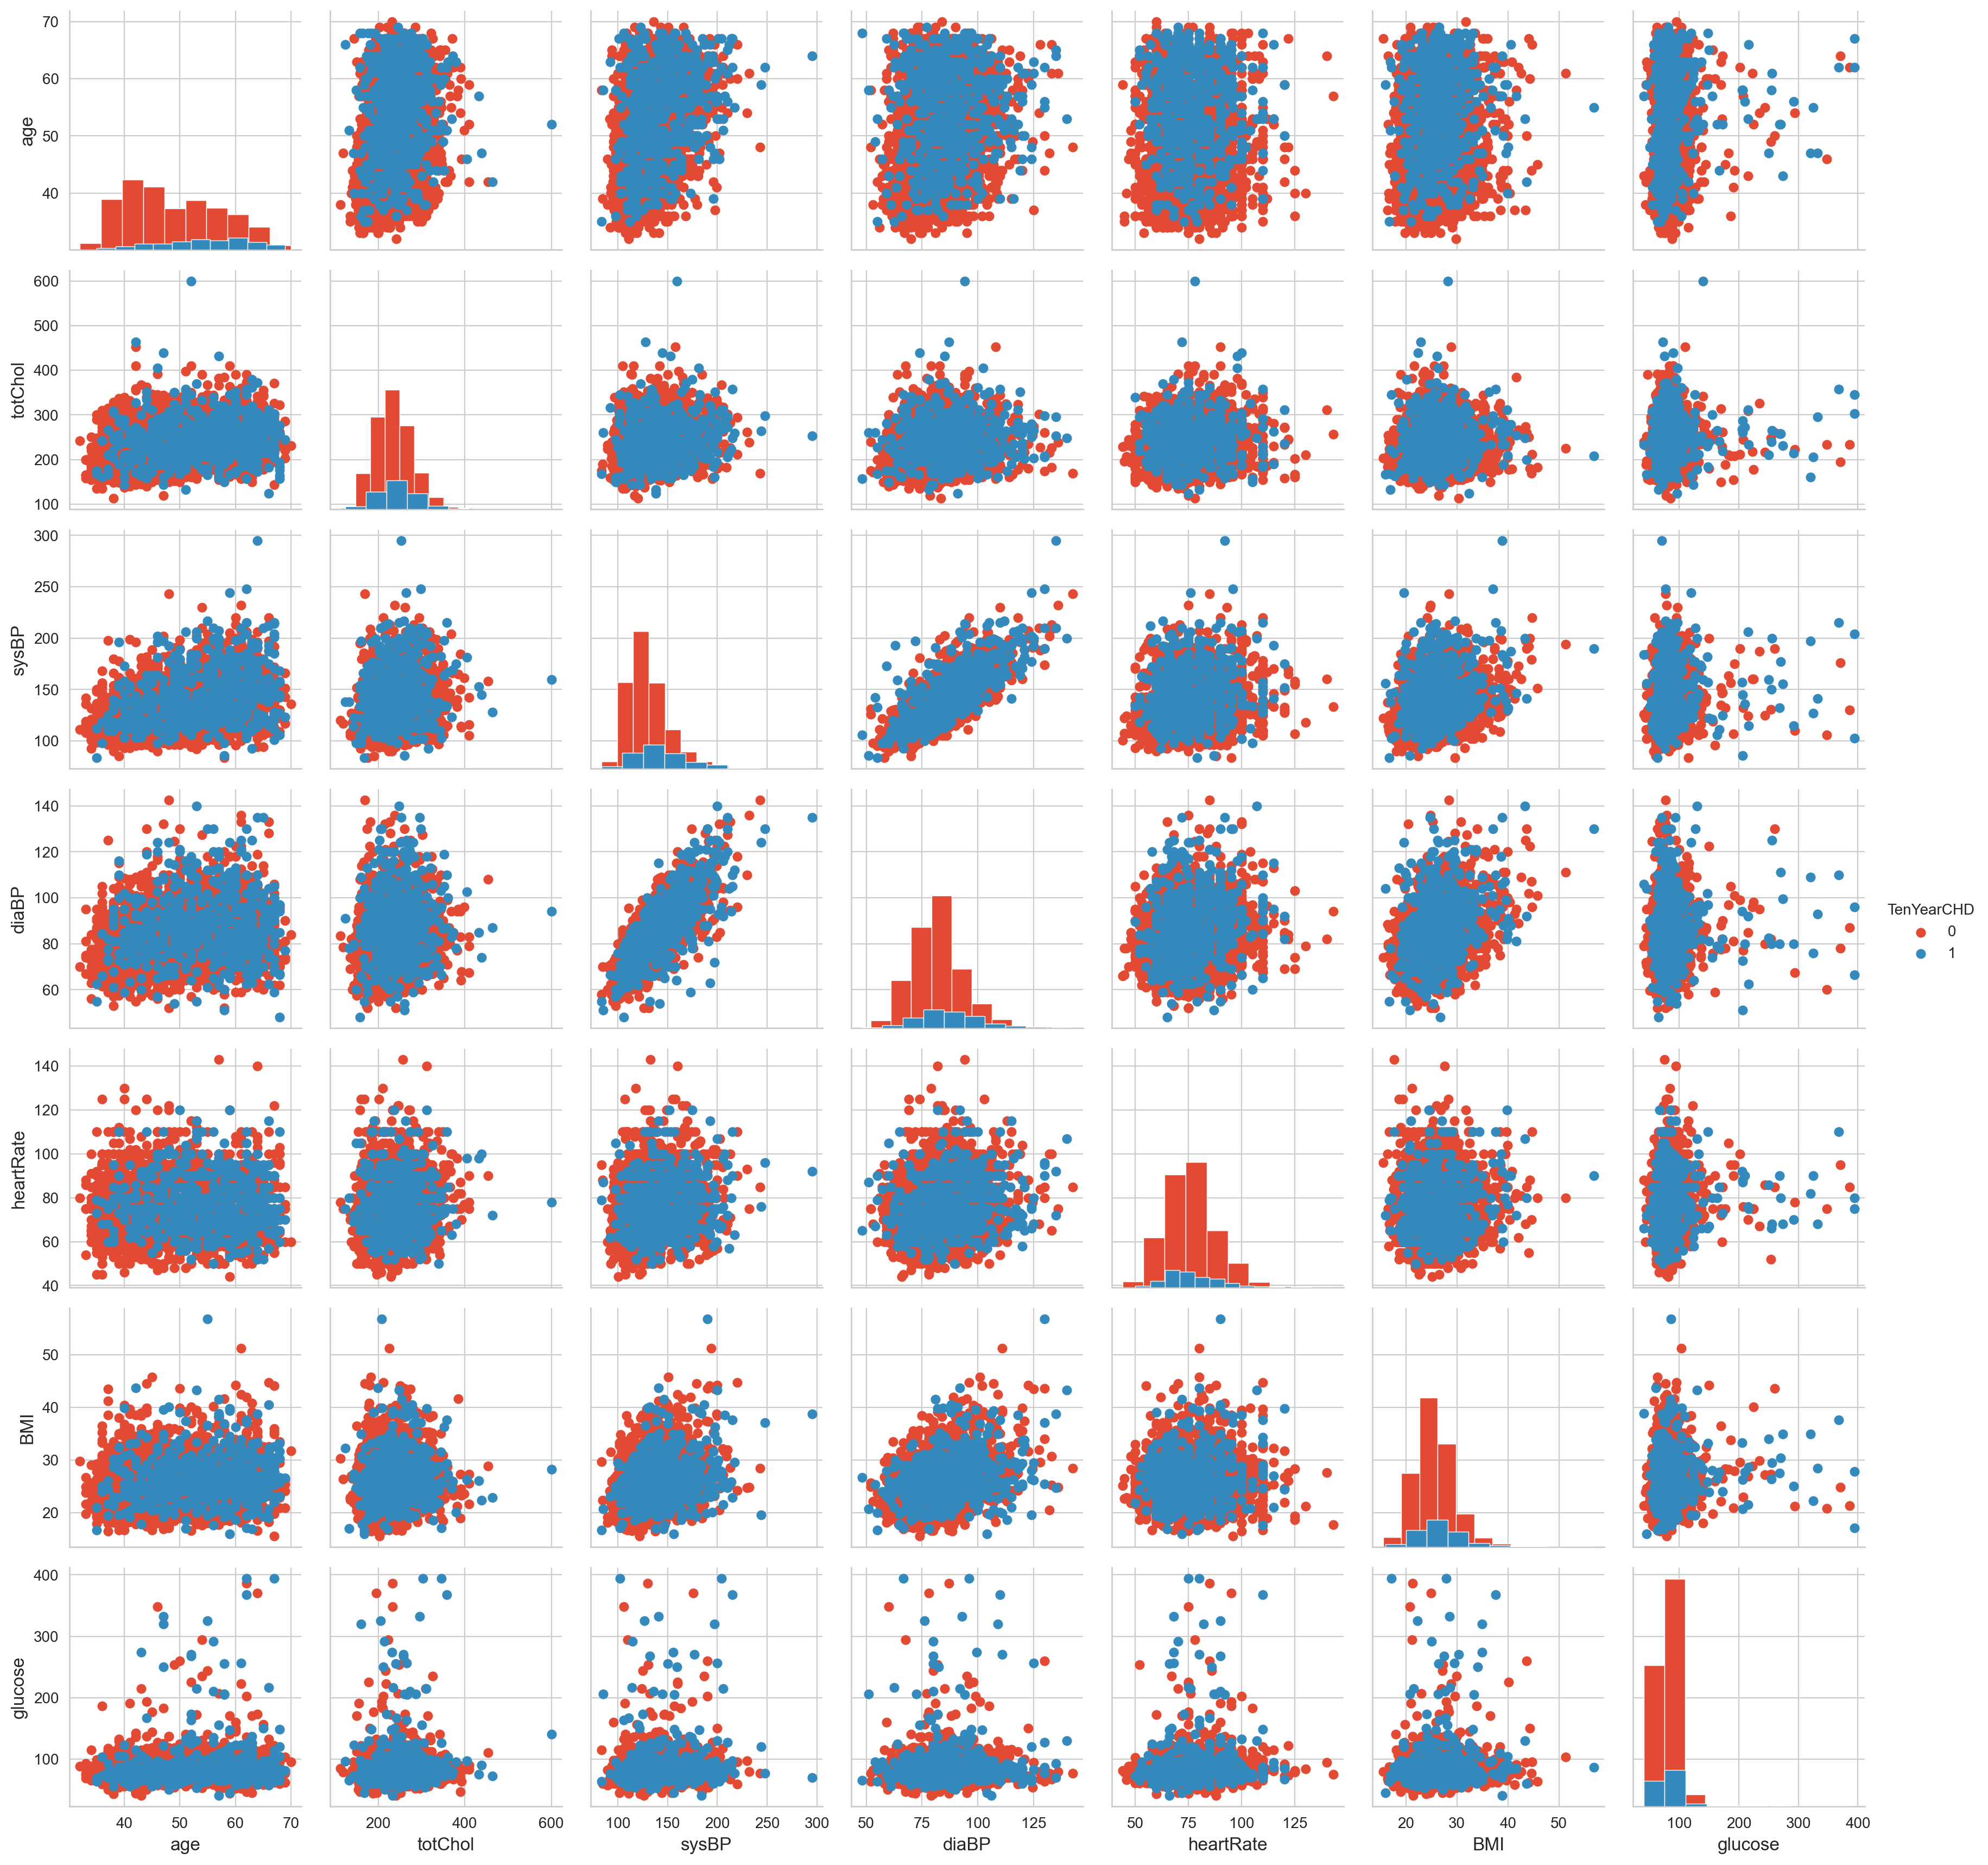

In [47]:
num_clmns=['age','totChol','sysBP','diaBP','heartRate','BMI','glucose','TenYearCHD']
g=sns.PairGrid(fh[num_clmns],hue='TenYearCHD')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()

OBSERVATIONS

In most of independent variables, the target variable distribution is non linear.

## Normalisation Checking

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='male', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='education', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='currentSmoker', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cigsPerDay', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BPMeds', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prevalentStroke', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prevalentHyp', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diabetes', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='totChol', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sysBP', ylabel='Density'>

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='diaBP', ylabel='Density'>

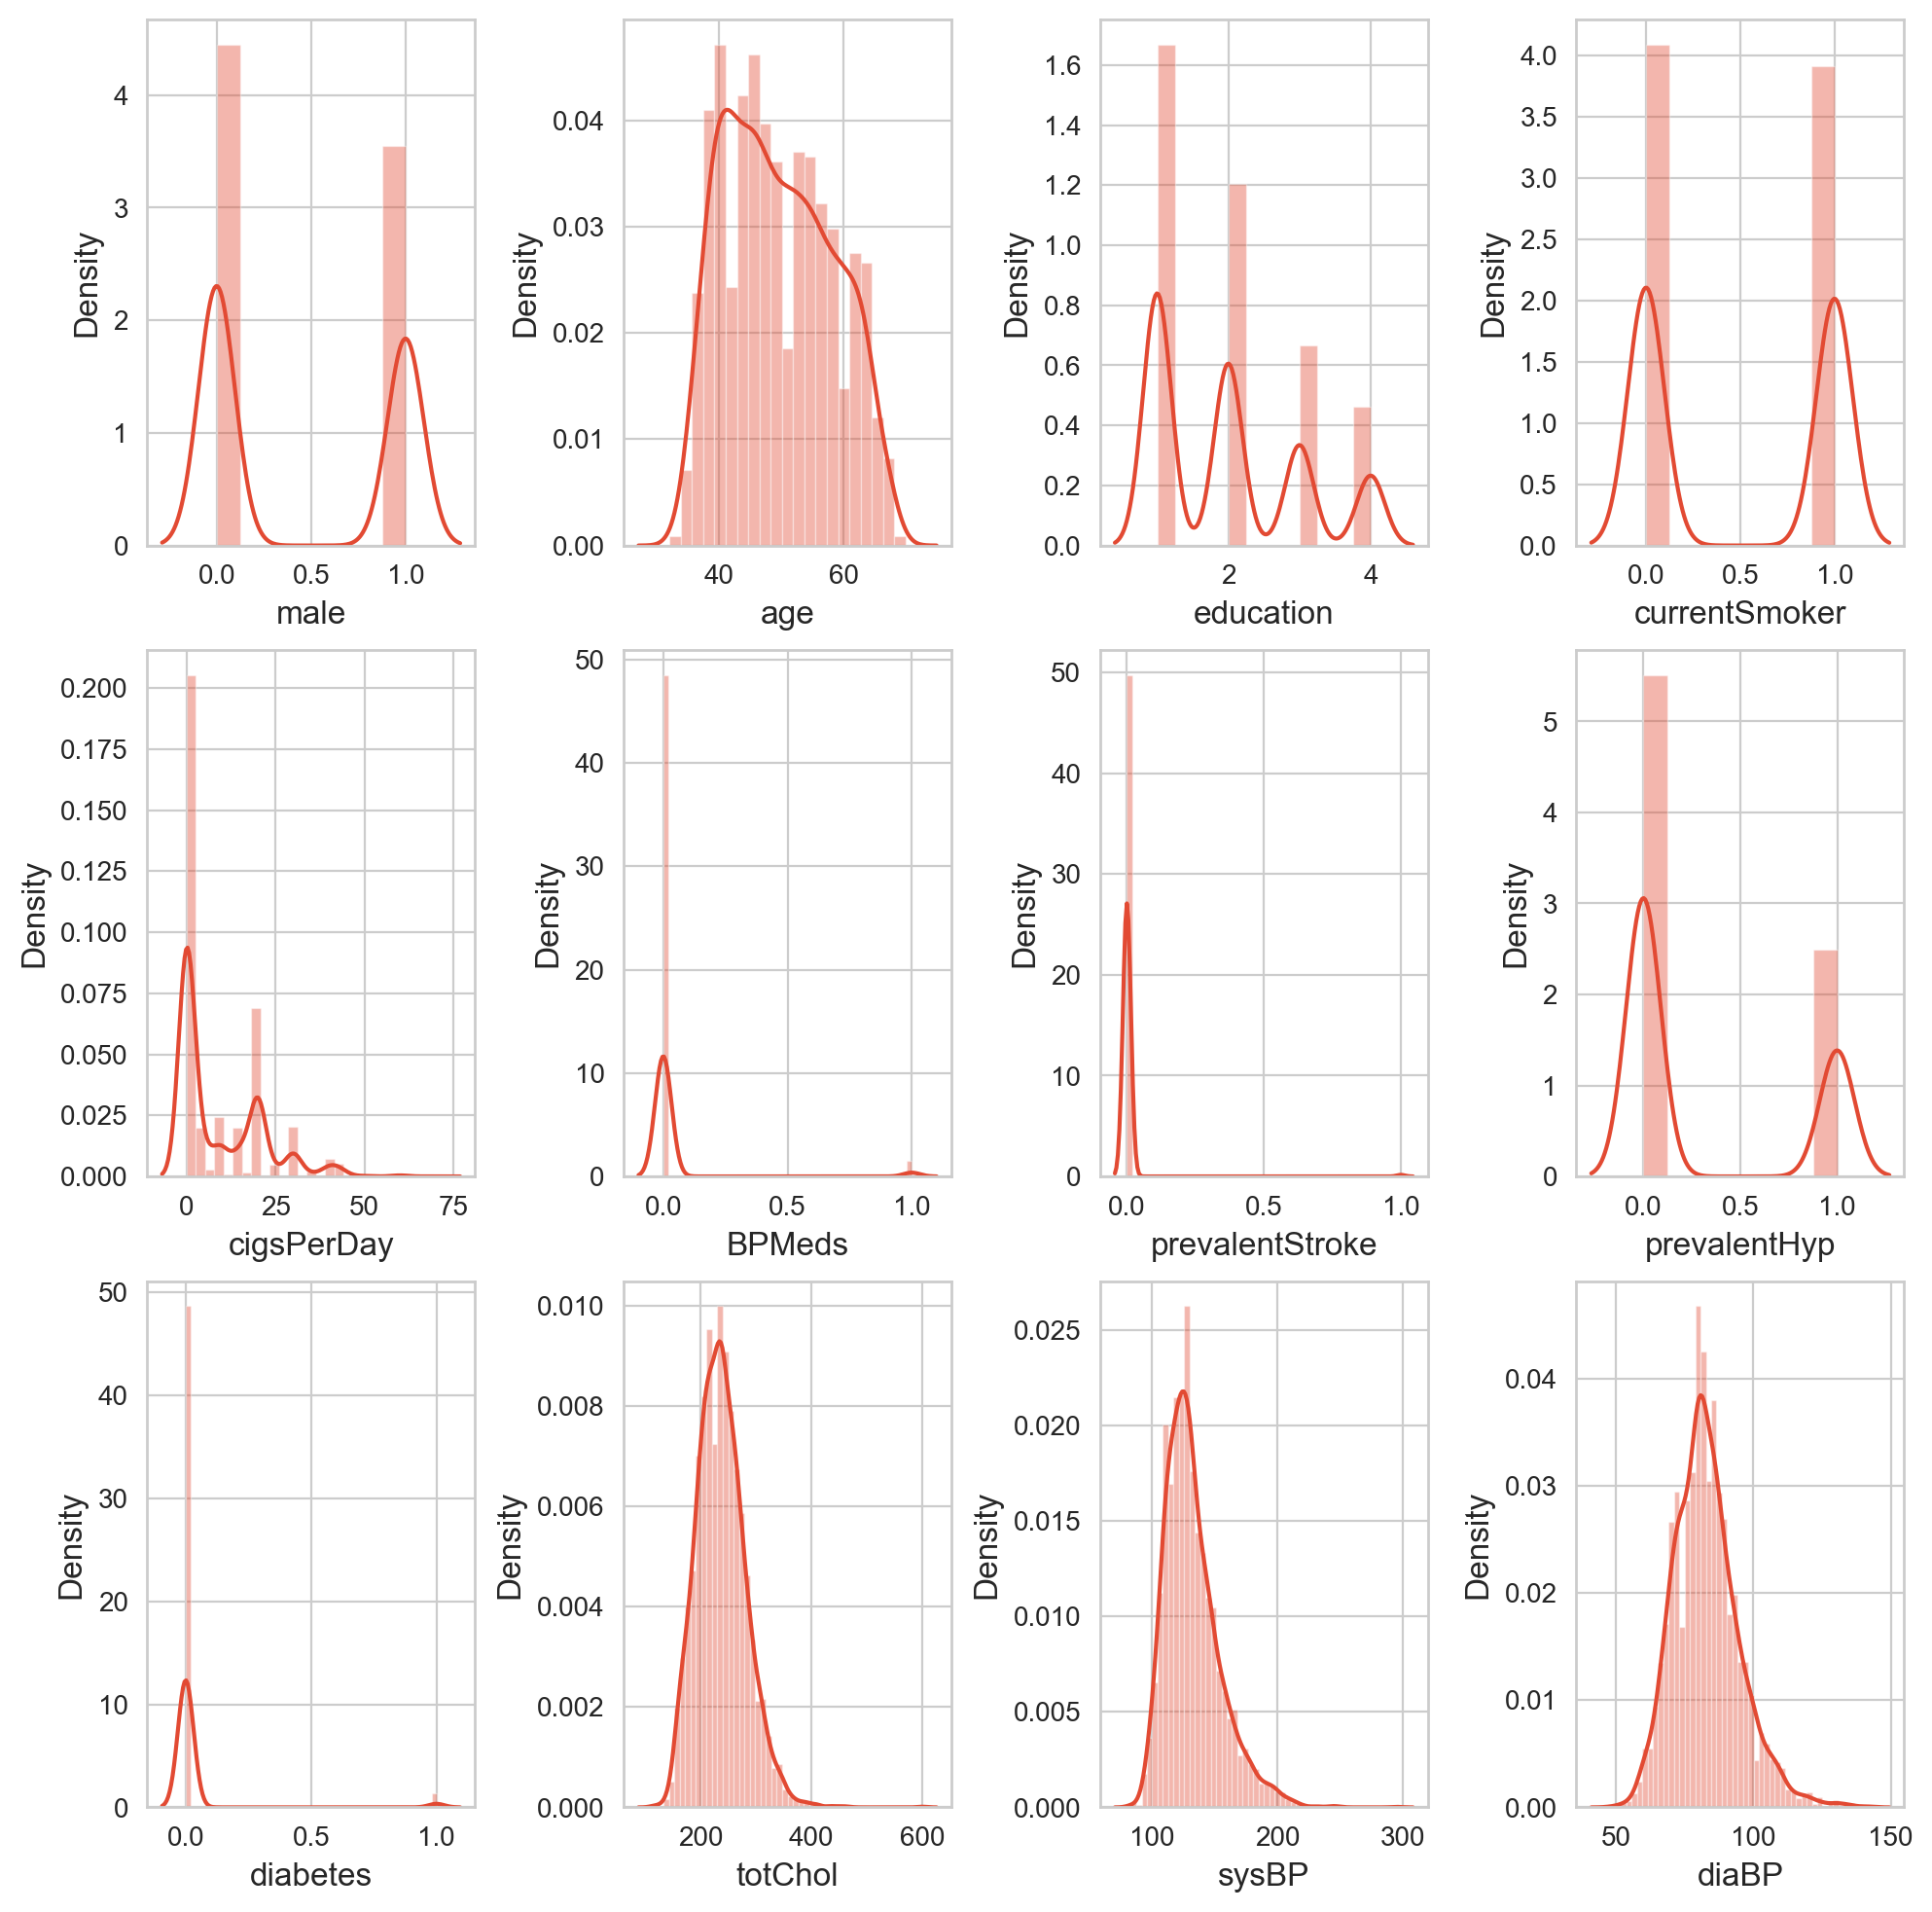

In [48]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i = 0
for k,v in fh.items():
    sns.distplot(v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)
plt.show()

## Corelation Analysis

<Figure size 1500x1500 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Corelation Analysis - Heat Map')

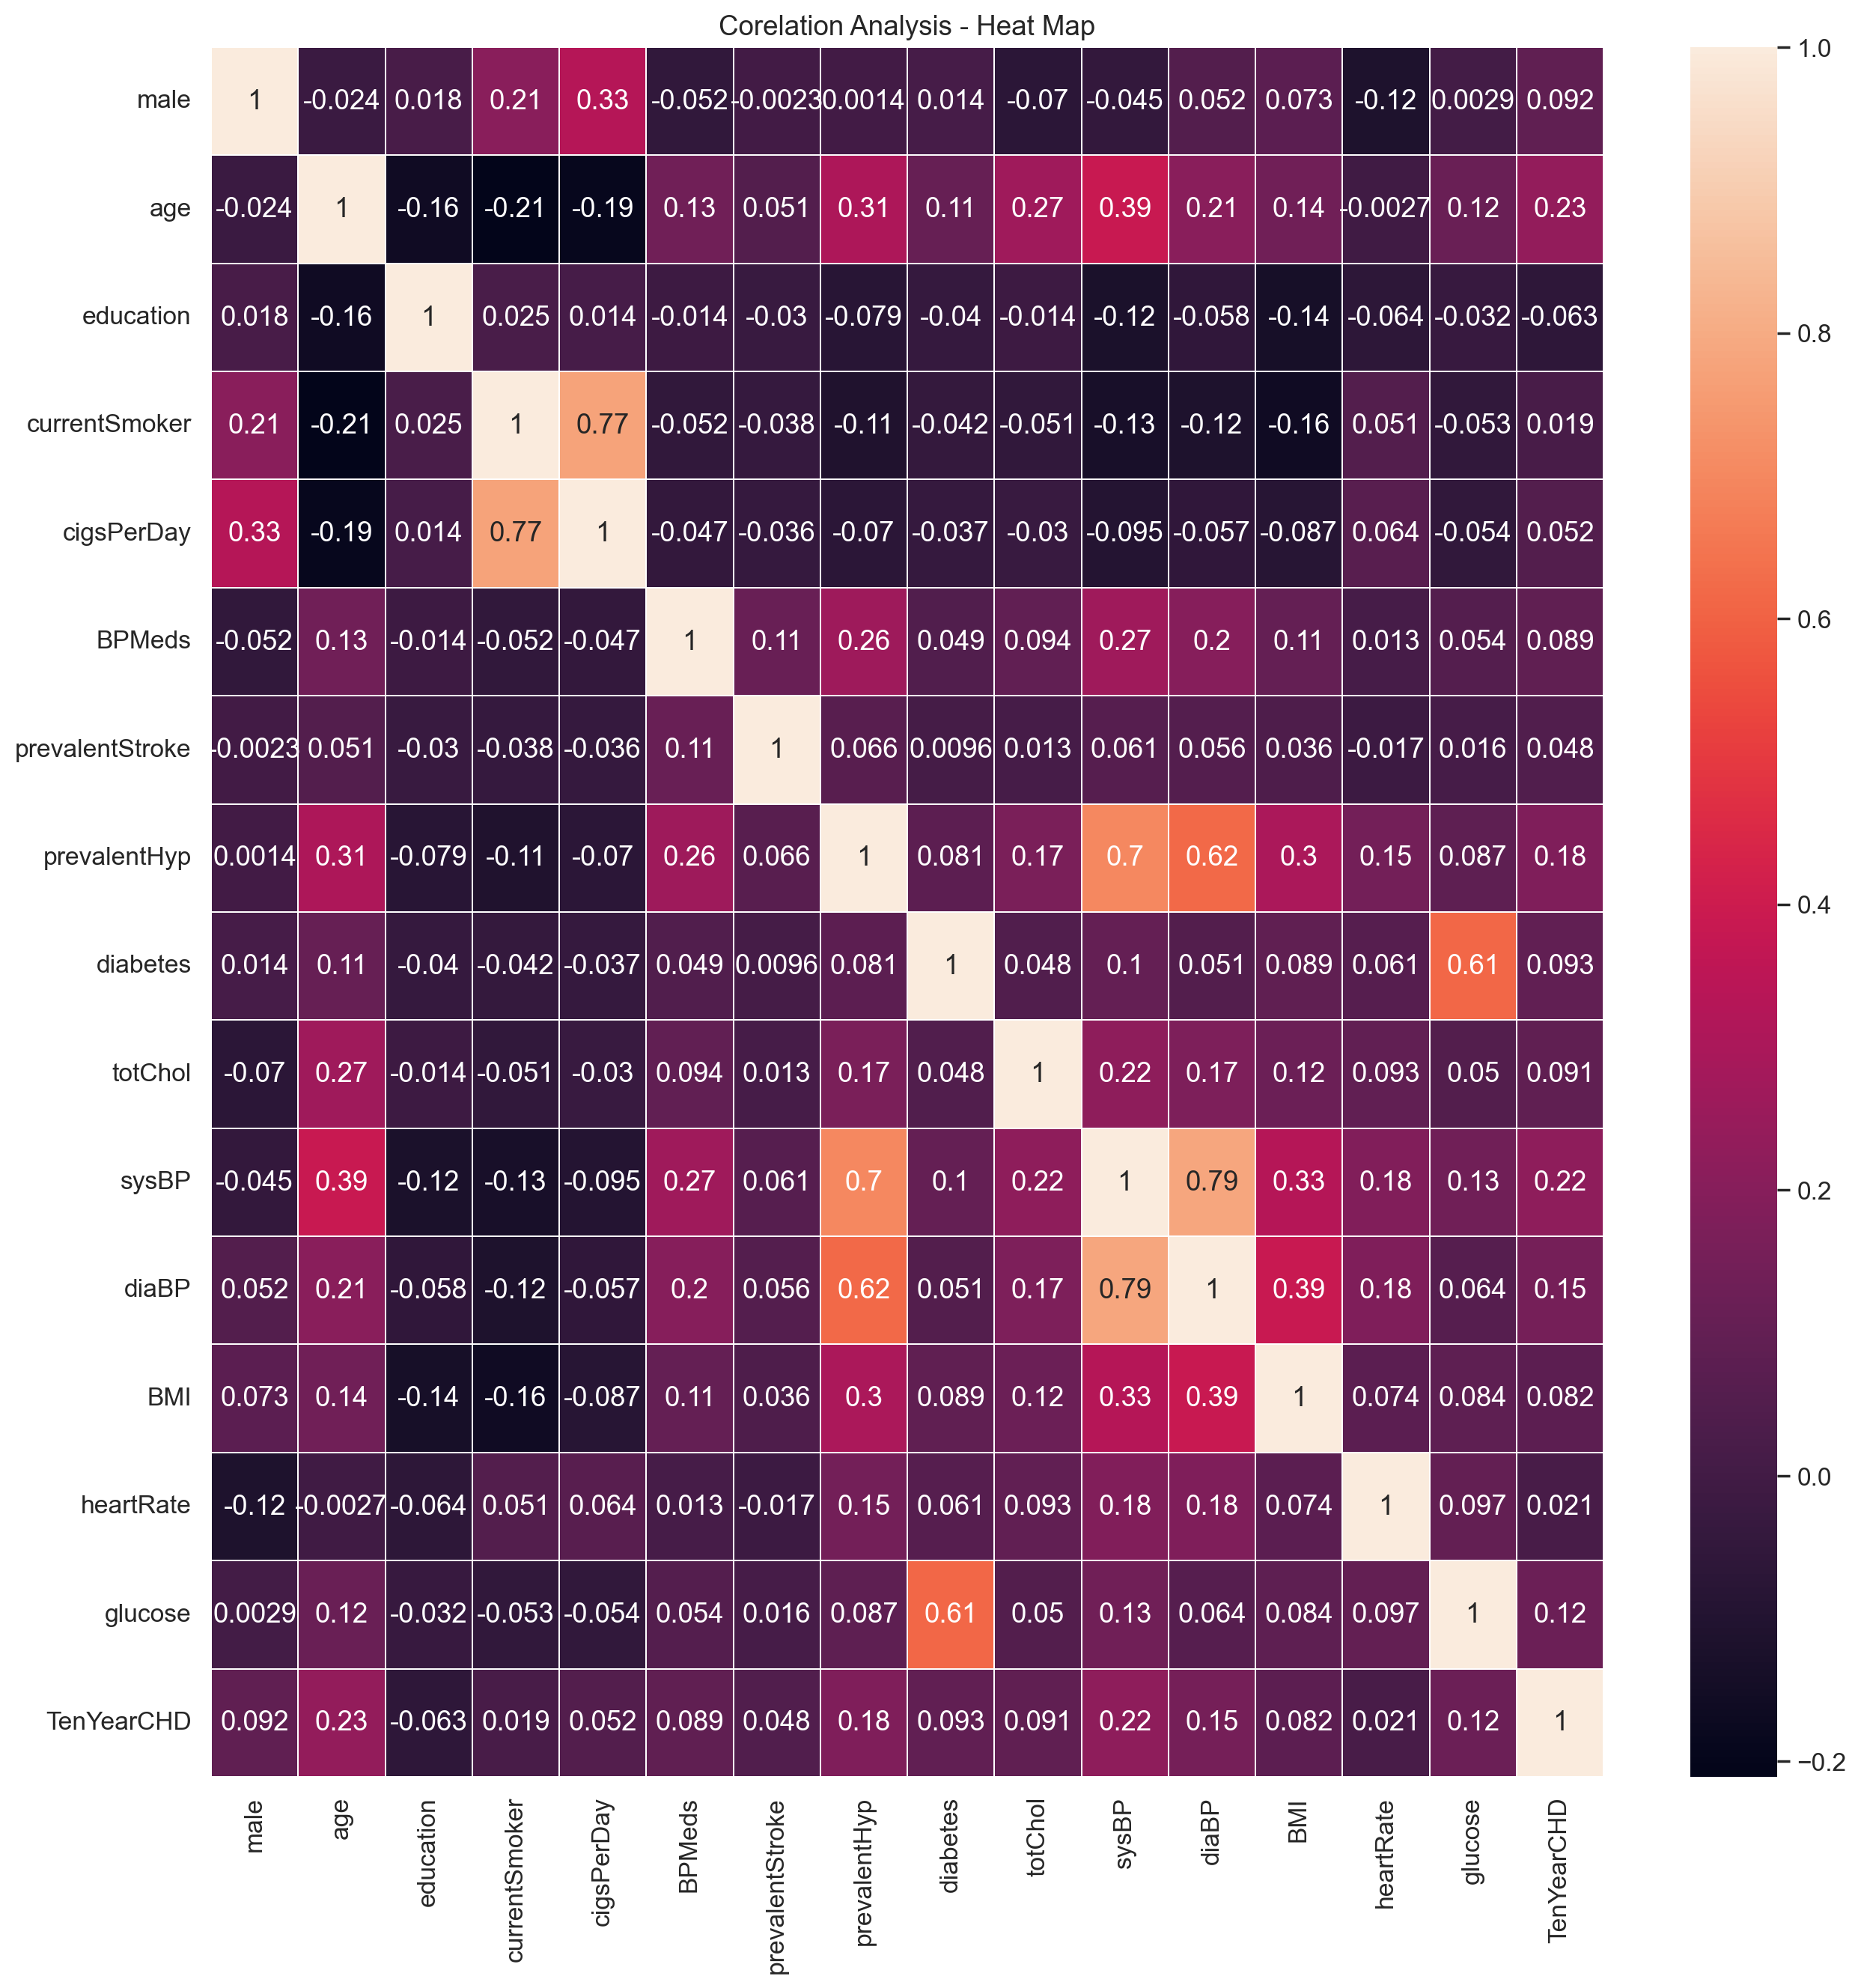

In [49]:
plt.figure(figsize=(15,15))
sns.set(font_scale=1.1)
sns.heatmap(fh.corr(), annot=True, linewidths=0.1)
plt.title('Corelation Analysis - Heat Map')
plt.show()

OBSERVATION

sysBP, age, totChol, cigsPerDay, diaBP, prevalentHYP, diabetes, BPMeds are the corelated variables.

## Feature Selection

In [51]:
# Identify the features with the most importance for the outcome variable Heart Disease

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# separate independent & dependent variables
X = fh.iloc[:,0:14]  #independent columns
y = fh.iloc[:,-1]    #target column i.e price range

# apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

              Specs       Score
10            sysBP  669.136021
1               age  296.200344
9           totChol  250.490205
4        cigsPerDay  155.798307
11            diaBP  142.521814
7      prevalentHyp   82.845455
8          diabetes   31.067621
5            BPMeds   28.191569
0              male   17.107751
12              BMI   15.785436
6   prevalentStroke    8.507833


In [52]:
featureScores = featureScores.sort_values(by='Score', ascending=False)
featureScores

Specs       Score
10            sysBP  669.136021
1               age  296.200344
9           totChol  250.490205
4        cigsPerDay  155.798307
11            diaBP  142.521814
7      prevalentHyp   82.845455
8          diabetes   31.067621
5            BPMeds   28.191569
0              male   17.107751
12              BMI   15.785436
6   prevalentStroke    8.507833
2         education    7.733287
13        heartRate    2.917287
3     currentSmoker    0.686474

<Figure size 2000x500 with 0 Axes>

<AxesSubplot:xlabel='Specs', ylabel='Score'>

Text(0.5, 1.0, 'Feature importance')

Text(0.5, 0, '\n Features')

Text(0, 0.5, 'Importance \n')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'sysBP'),
  Text(1, 0, 'age'),
  Text(2, 0, 'totChol'),
  Text(3, 0, 'cigsPerDay'),
  Text(4, 0, 'diaBP'),
  Text(5, 0, 'prevalentHyp'),
  Text(6, 0, 'diabetes'),
  Text(7, 0, 'BPMeds'),
  Text(8, 0, 'male'),
  Text(9, 0, 'BMI'),
  Text(10, 0, 'prevalentStroke'),
  Text(11, 0, 'education'),
  Text(12, 0, 'heartRate'),
  Text(13, 0, 'currentSmoker')])

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

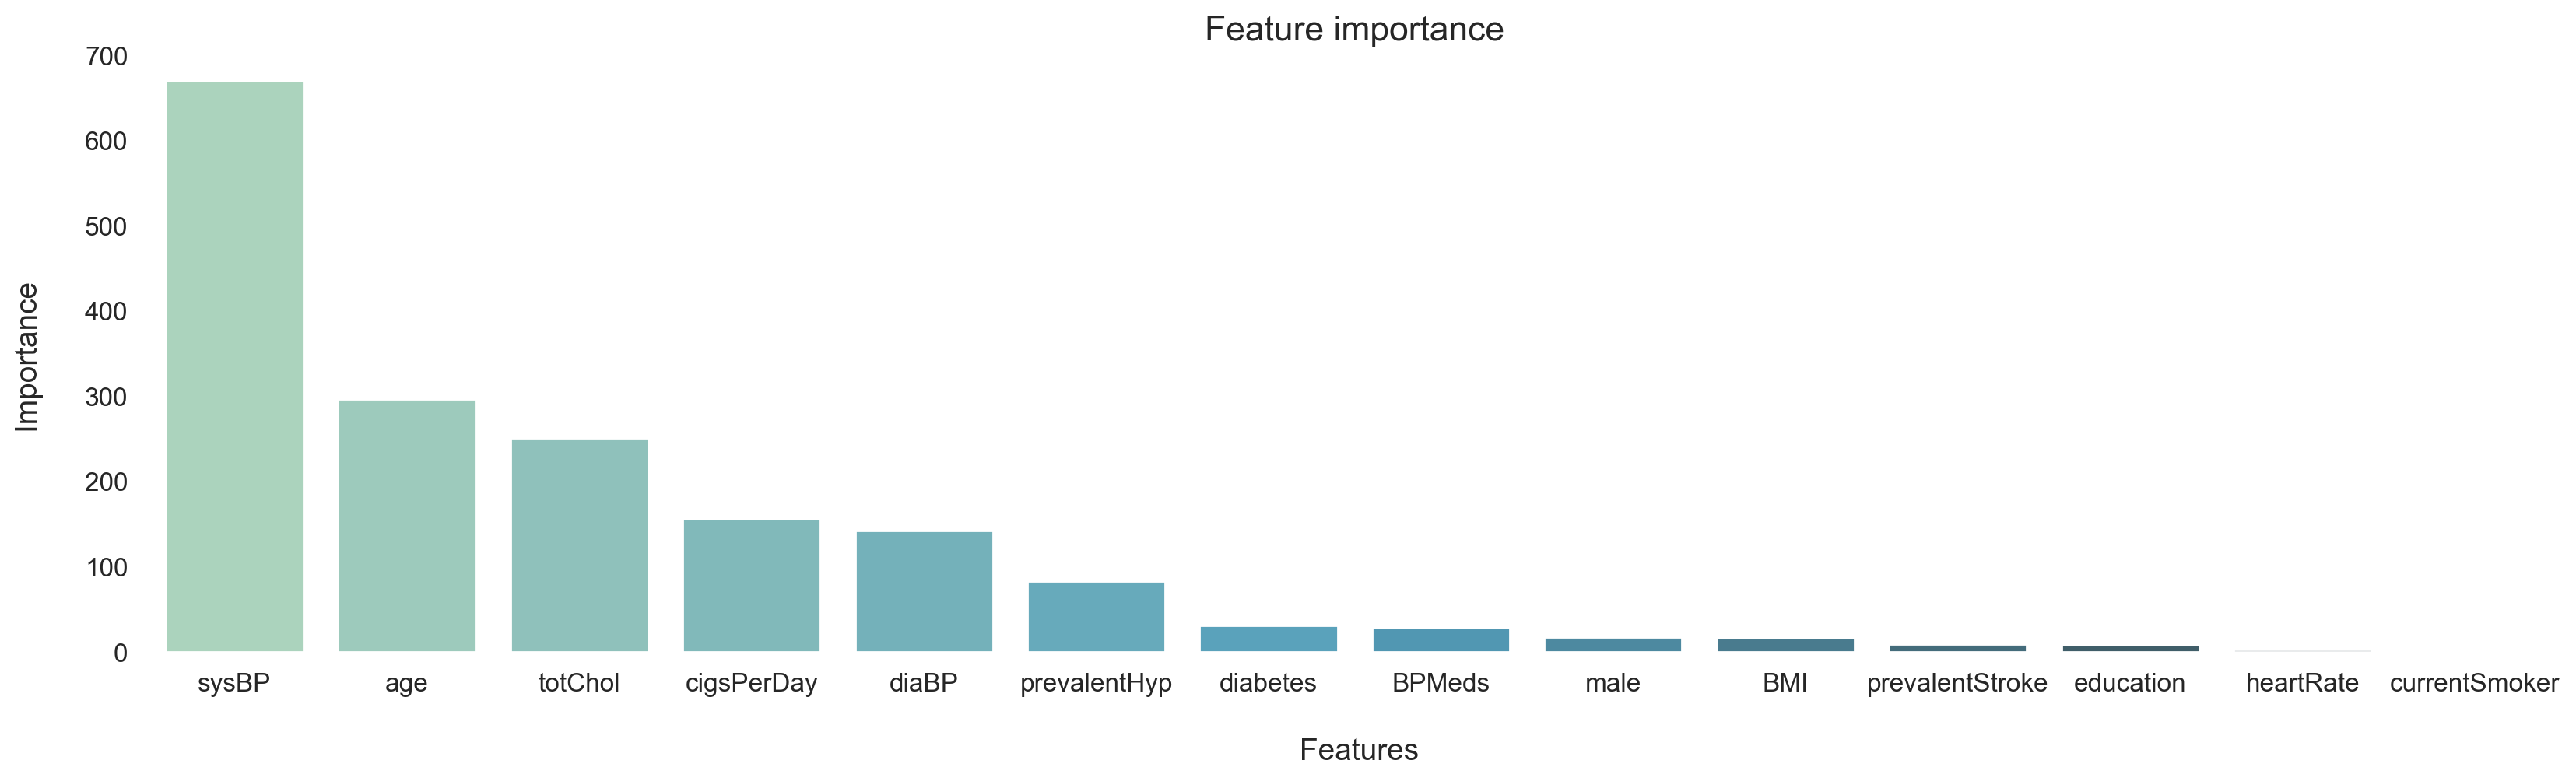

In [53]:
# visualizing feature selection
plt.figure(figsize=(20,5))
sns.barplot(x='Specs', y='Score', data=featureScores, palette = "GnBu_d")
plt.box(False)
plt.title('Feature importance', fontsize=16)
plt.xlabel('\n Features', fontsize=14)
plt.ylabel('Importance \n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

OBSERVATION

In the above graph we can see the importance of each variables that can cause CHD in a person. Here variables like currentSmoker, heartrate, education, prevalentStroke are least important, whereas sysBP, age, totChol etc. are important variables.

In [54]:
# selecting the 10 most impactful features for the target variable
features_list = featureScores["Specs"].tolist()[:10]
features_list

['sysBP',
 'age',
 'totChol',
 'cigsPerDay',
 'diaBP',
 'prevalentHyp',
 'diabetes',
 'BPMeds',
 'male',
 'BMI']


We will keep only those features which has the strongest relationship with the output variable

In [55]:
# Create new dataframe with selected features

fh = fh[['sysBP', 'glucose','age','totChol','cigsPerDay','diaBP','prevalentHyp','diabetes','BPMeds','male','TenYearCHD']]
fh.head()

sysBP  glucose  age  totChol  cigsPerDay  diaBP  prevalentHyp  diabetes  \
0  106.0     77.0   39    195.0           0   70.0             0         0   
1  121.0     76.0   46    250.0           0   81.0             0         0   
2  127.5     70.0   48    245.0          20   80.0             0         0   
3  150.0    103.0   61    225.0          30   95.0             1         0   
4  130.0     85.0   46    285.0          23   84.0             0         0   

   BPMeds  male  TenYearCHD  
0     0.0     1           0  
1     0.0     0           0  
2     0.0     1           0  
3     0.0     0           1  
4     0.0     0           0

<Figure size 1500x1500 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Corelation Analysis - Heat Map')

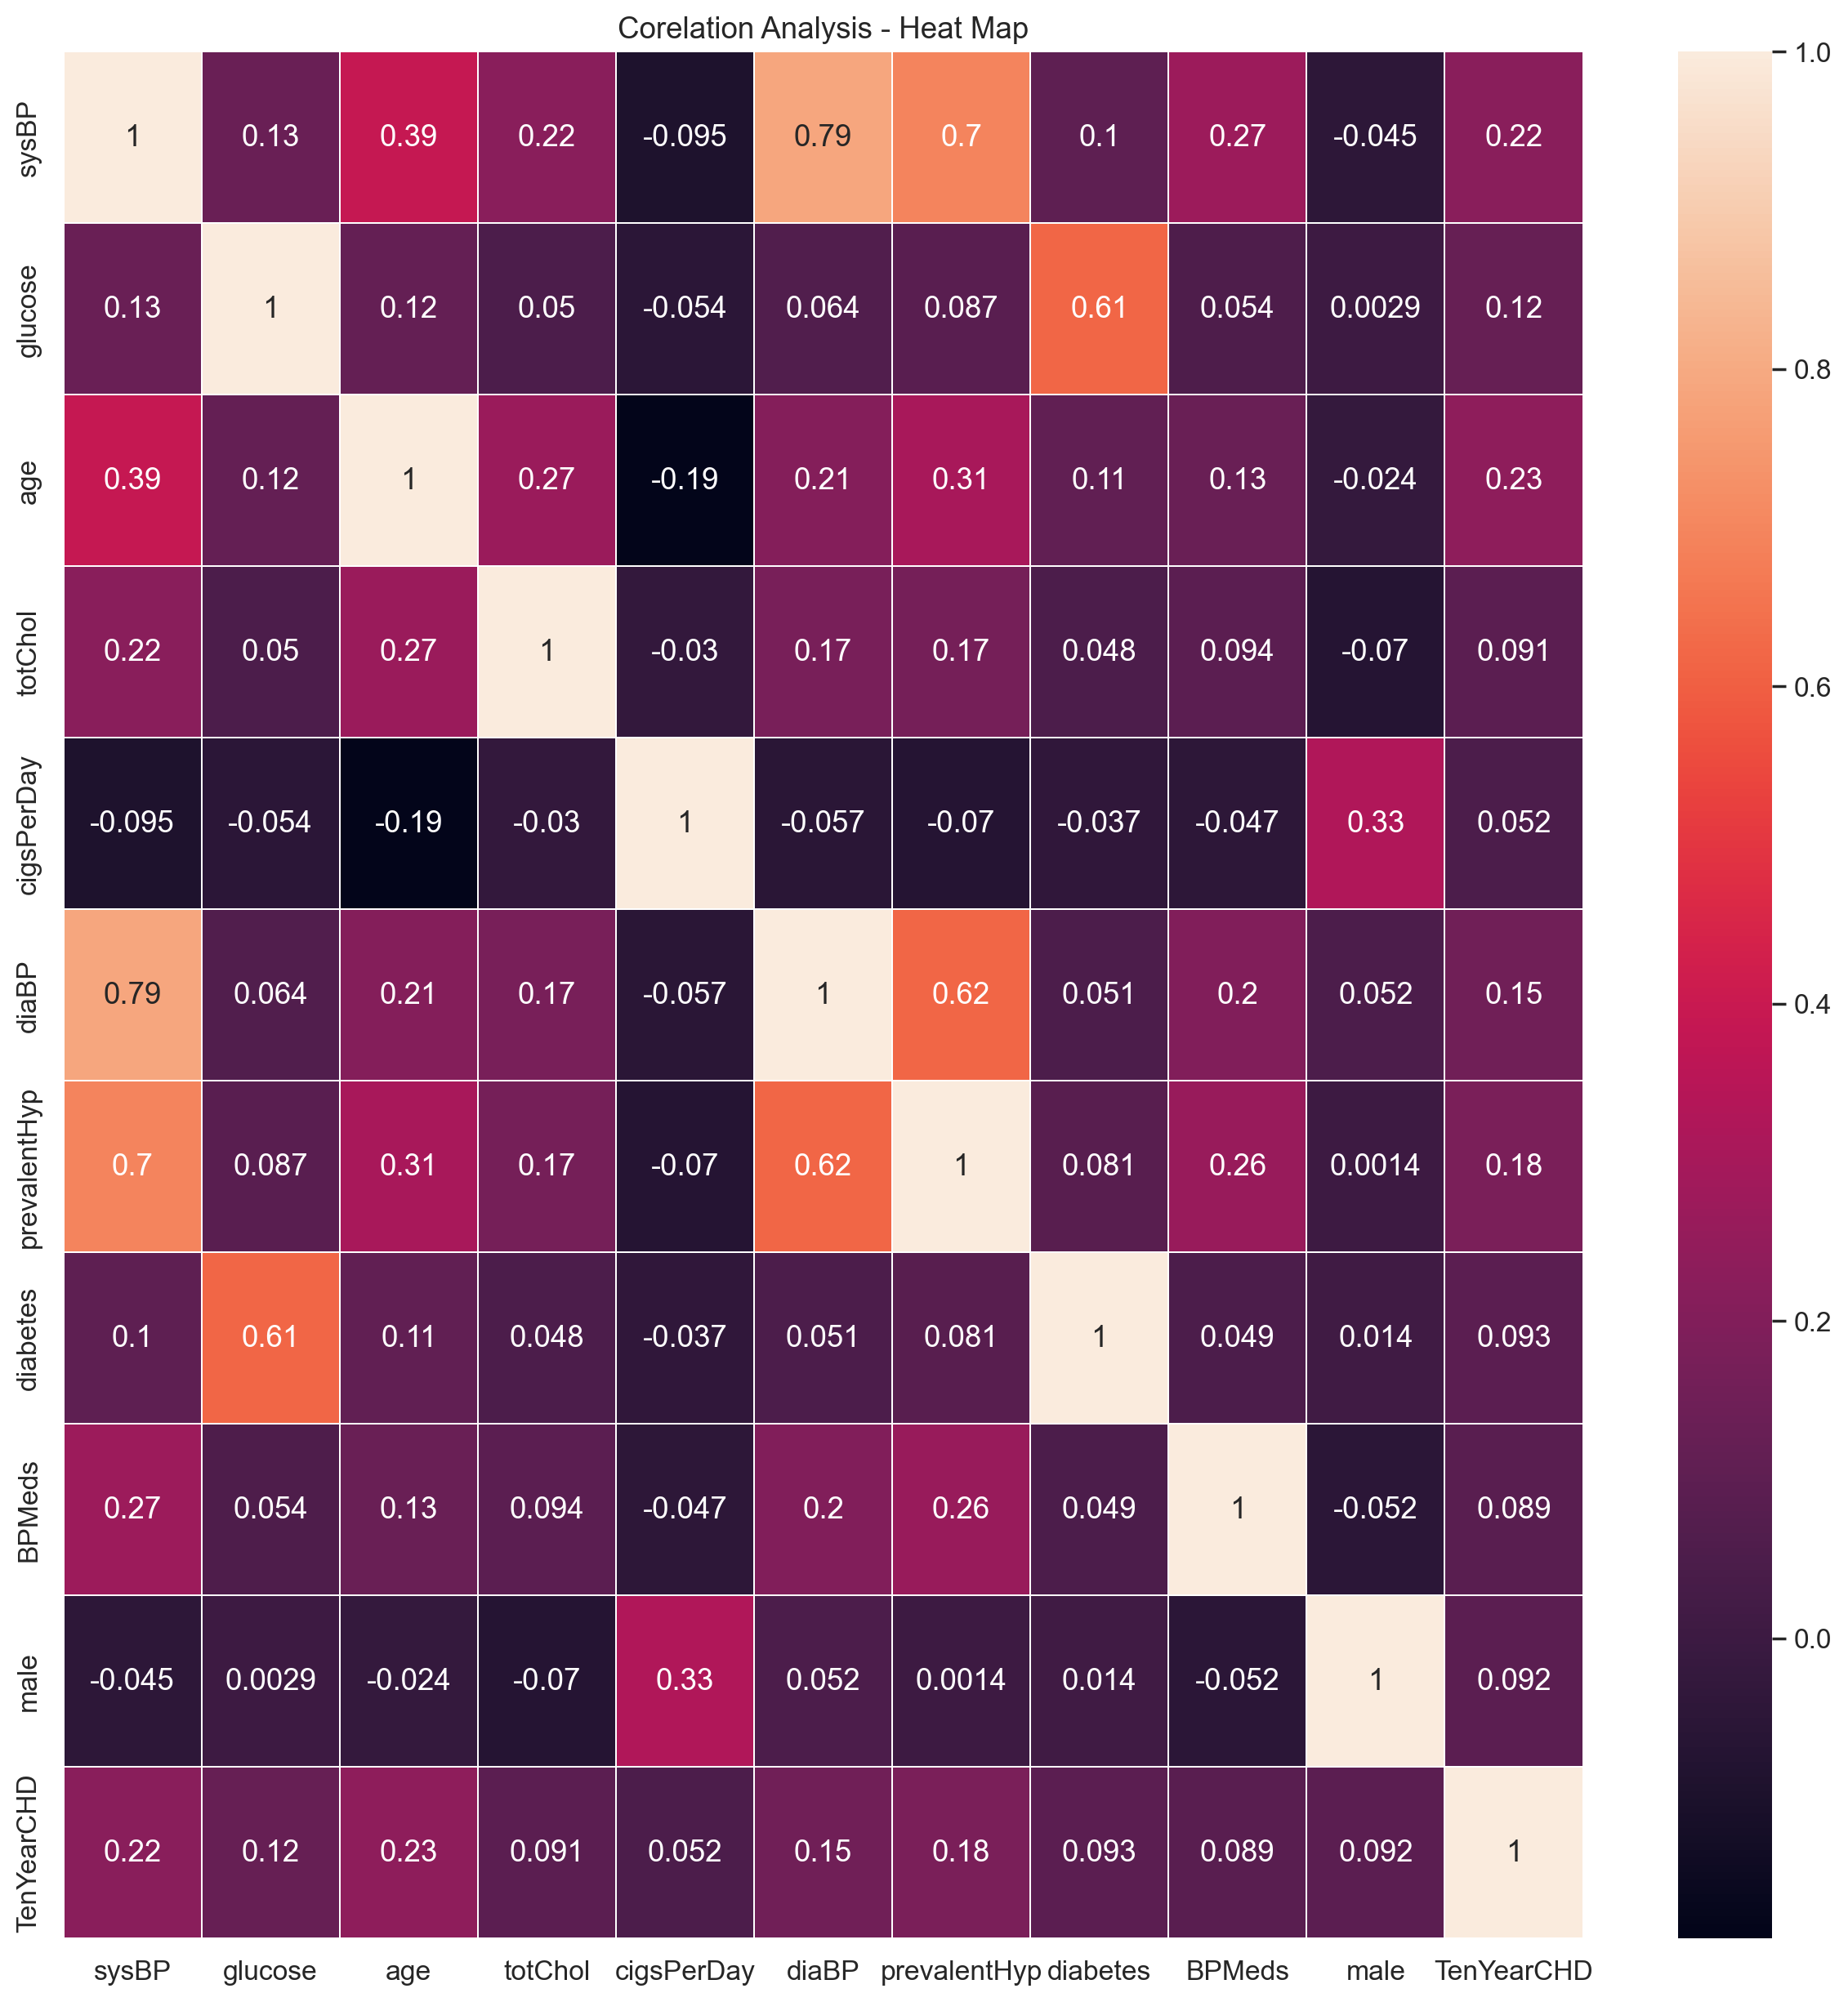

In [56]:
# Checking correlation again


plt.figure(figsize=(15,15))
sns.set(font_scale=1.1)
sns.heatmap(fh.corr(), annot=True, linewidths=0.1)
plt.title('Corelation Analysis - Heat Map')
plt.show()

In this corelation there are only important features that can cause CHD.

## Feature Scaling

Since we want to try out different models, and also these use distant as a measure, we will scale our feature.

In [57]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler(feature_range=(0,1))

#assign scaler to column:
df_scaled = pd.DataFrame(scaler.fit_transform(fh), columns=fh.columns)

In [58]:
df_scaled.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  3658.000000  3658.000000  3658.000000  3658.000000  3658.000000   
mean      0.231066     0.118229     0.461893     0.254307     0.128935   
std       0.104430     0.067526     0.225317     0.090550     0.170308   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.158392     0.087571     0.263158     0.190965     0.000000   
50%       0.210402     0.107345     0.447368     0.248460     0.000000   
75%       0.285461     0.132768     0.631579     0.308008     0.285714   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3658.000000   3658.000000  3658.000000  3658.000000  3658.000000   
mean      0.369492      0.311646     0.027064     0.030344     0.443685   
std       0.126712      0.463229     0.162292     0.171557     0.496886   
min       0.000000      0.000000     0.000000     0.000000     0.000000   
25%       0.285714      0.000000     0.000000     0.000000     0.000000   
50%       0.359788      0.000000     0.000000     0.000000     0.000000   
75%       0.444444      1.000000     0.000000     0.000000     1.000000   
max       1.000000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3658.000000  
mean      0.152269  
std       0.359331  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [59]:
fh.describe()

sysBP      glucose          age      totChol   cigsPerDay  \
count  3658.000000  3658.000000  3658.000000  3658.000000  3658.000000   
mean    132.370558    81.852925    49.551941   236.847731     9.025424   
std      22.086866    23.904164     8.562029    44.097681    11.921590   
min      83.500000    40.000000    32.000000   113.000000     0.000000   
25%     117.000000    71.000000    42.000000   206.000000     0.000000   
50%     128.000000    78.000000    49.000000   234.000000     0.000000   
75%     143.875000    87.000000    56.000000   263.000000    20.000000   
max     295.000000   394.000000    70.000000   600.000000    70.000000   

             diaBP  prevalentHyp     diabetes       BPMeds         male  \
count  3658.000000   3658.000000  3658.000000  3658.000000  3658.000000   
mean     82.917031      0.311646     0.027064     0.030344     0.443685   
std      11.974258      0.463229     0.162292     0.171557     0.496886   
min      48.000000      0.000000     0.000000     0.000000     0.000000   
25%      75.000000      0.000000     0.000000     0.000000     0.000000   
50%      82.000000      0.000000     0.000000     0.000000     0.000000   
75%      90.000000      1.000000     0.000000     0.000000     1.000000   
max     142.500000      1.000000     1.000000     1.000000     1.000000   

        TenYearCHD  
count  3658.000000  
mean      0.152269  
std       0.359331  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

## Test Train Split

In [60]:
y = df_scaled['TenYearCHD']
X = df_scaled.drop(['TenYearCHD'], axis = 1)

# divide train test: 60 % - 40 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=29)

In [61]:
print(len(X_train))
print(len(X_test))

2194
1464


We have splitted the data in training and testing data in 60% and 40% respectively.

## Resampling imbalanced data set

Class 0: 3101
Class 1: 557
Proportion: 5.57 : 1


/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease\n')

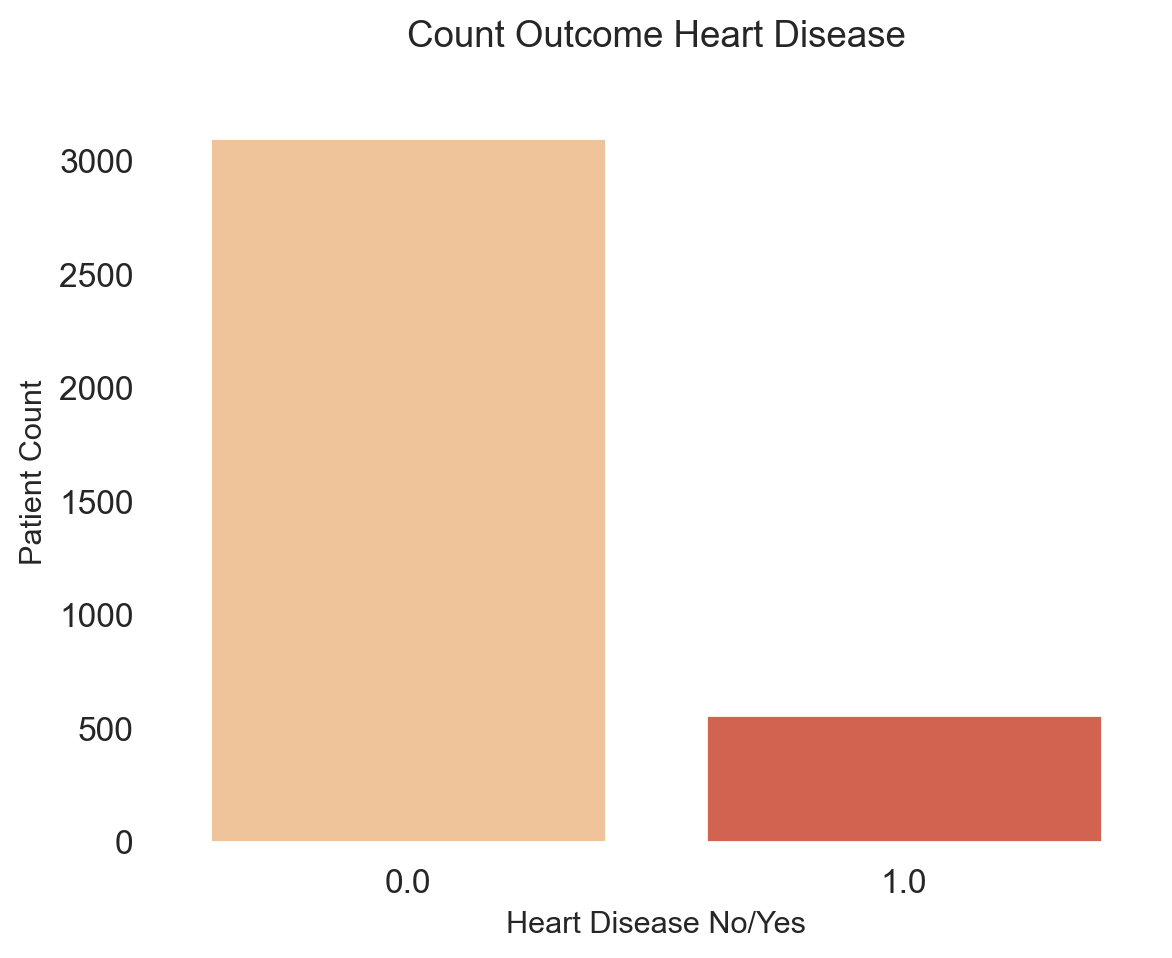

In [62]:
# Checking balance of outcome variable
target_count = df_scaled.TenYearCHD.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

sns.countplot(df_scaled.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease\n')
plt.savefig('Balance Heart Disease.png')
plt.show()

## Undersampling Method

0.0    611
1.0    557
Name: TenYearCHD, dtype: int64

/Users/poojakuber/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

Text(0.5, 0, 'Heart Disease No/Yes')

Text(0, 0.5, 'Patient Count')

Text(0.5, 1.0, 'Count Outcome Heart Disease after Resampling\n')

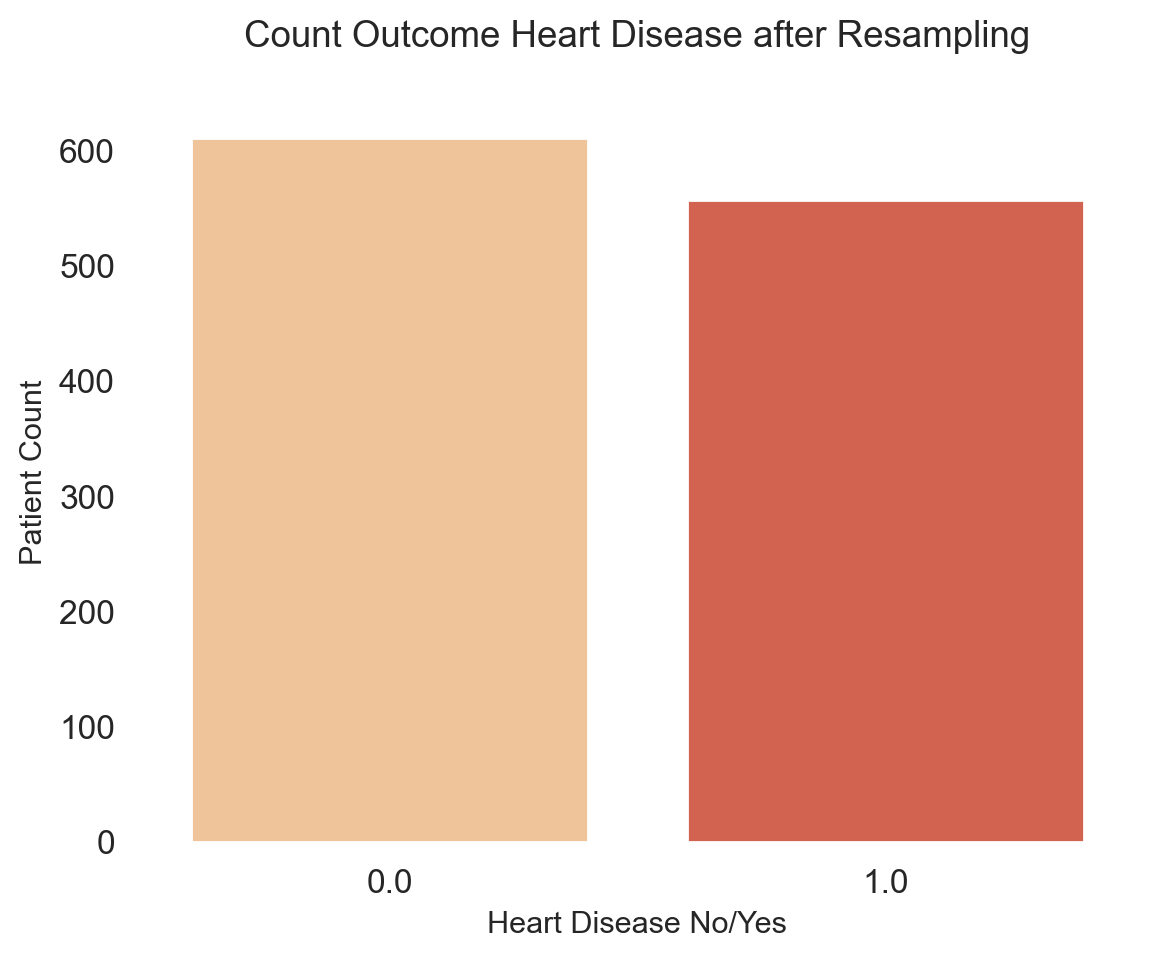

In [63]:
# Shuffle df
shuffled_df = df_scaled.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 1]

#Randomly select 492 observations from the non-fraud (majority class)
non_CHD_df = shuffled_df.loc[shuffled_df['TenYearCHD'] == 0].sample(n=611,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([CHD_df, non_CHD_df])

# check new class counts
normalized_df.TenYearCHD.value_counts()

# plot new count
sns.countplot(normalized_df.TenYearCHD, palette="OrRd")
plt.box(False)
plt.xlabel('Heart Disease No/Yes',fontsize=11)
plt.ylabel('Patient Count',fontsize=11)
plt.title('Count Outcome Heart Disease after Resampling\n')
#plt.savefig('Balance Heart Disease.png')
plt.show()

## Model Pipeline

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

y_train = normalized_df['TenYearCHD']
X_train = normalized_df.drop('TenYearCHD', axis=1)

from sklearn.pipeline import Pipeline

classifiers = [LogisticRegression(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(2)]

for classifier in classifiers:
    pipe = Pipeline(steps=[('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print("The accuracy score of {0} is: {1:.2f}%".format(classifier,(pipe.score(X_test, y_test)*100)))

Pipeline(steps=[('classifier', LogisticRegression())])

The accuracy score of LogisticRegression() is: 70.15%


Pipeline(steps=[('classifier', SVC())])

The accuracy score of SVC() is: 69.33%


Pipeline(steps=[('classifier', DecisionTreeClassifier())])

The accuracy score of DecisionTreeClassifier() is: 71.31%


Pipeline(steps=[('classifier', KNeighborsClassifier(n_neighbors=2))])

The accuracy score of KNeighborsClassifier(n_neighbors=2) is: 80.05%


## Modeling and Evolution without pipeline

In [65]:
# logistic regression again with the balanced dataset

normalized_df_reg = LogisticRegression().fit(X_train, y_train)

normalized_df_reg_pred = normalized_df_reg.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct
acc = accuracy_score(y_test, normalized_df_reg_pred)
print(f"The accuracy score for LogReg is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall,
# where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_reg_pred)
print(f"The f1 score for LogReg is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct
precision = precision_score(y_test, normalized_df_reg_pred)
print(f"The precision score for LogReg is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes
recall = recall_score(y_test, normalized_df_reg_pred)
print(f"The recall score for LogReg is: {round(recall,3)*100}%")

The accuracy score for LogReg is: 70.19999999999999%
The f1 score for LogReg is: 40.699999999999996%
The precision score for LogReg is: 29.299999999999997%
The recall score for LogReg is: 66.7%


<AxesSubplot:>

Text(0.5, 1.5, 'Confusion matrix Logistic Regression\n')

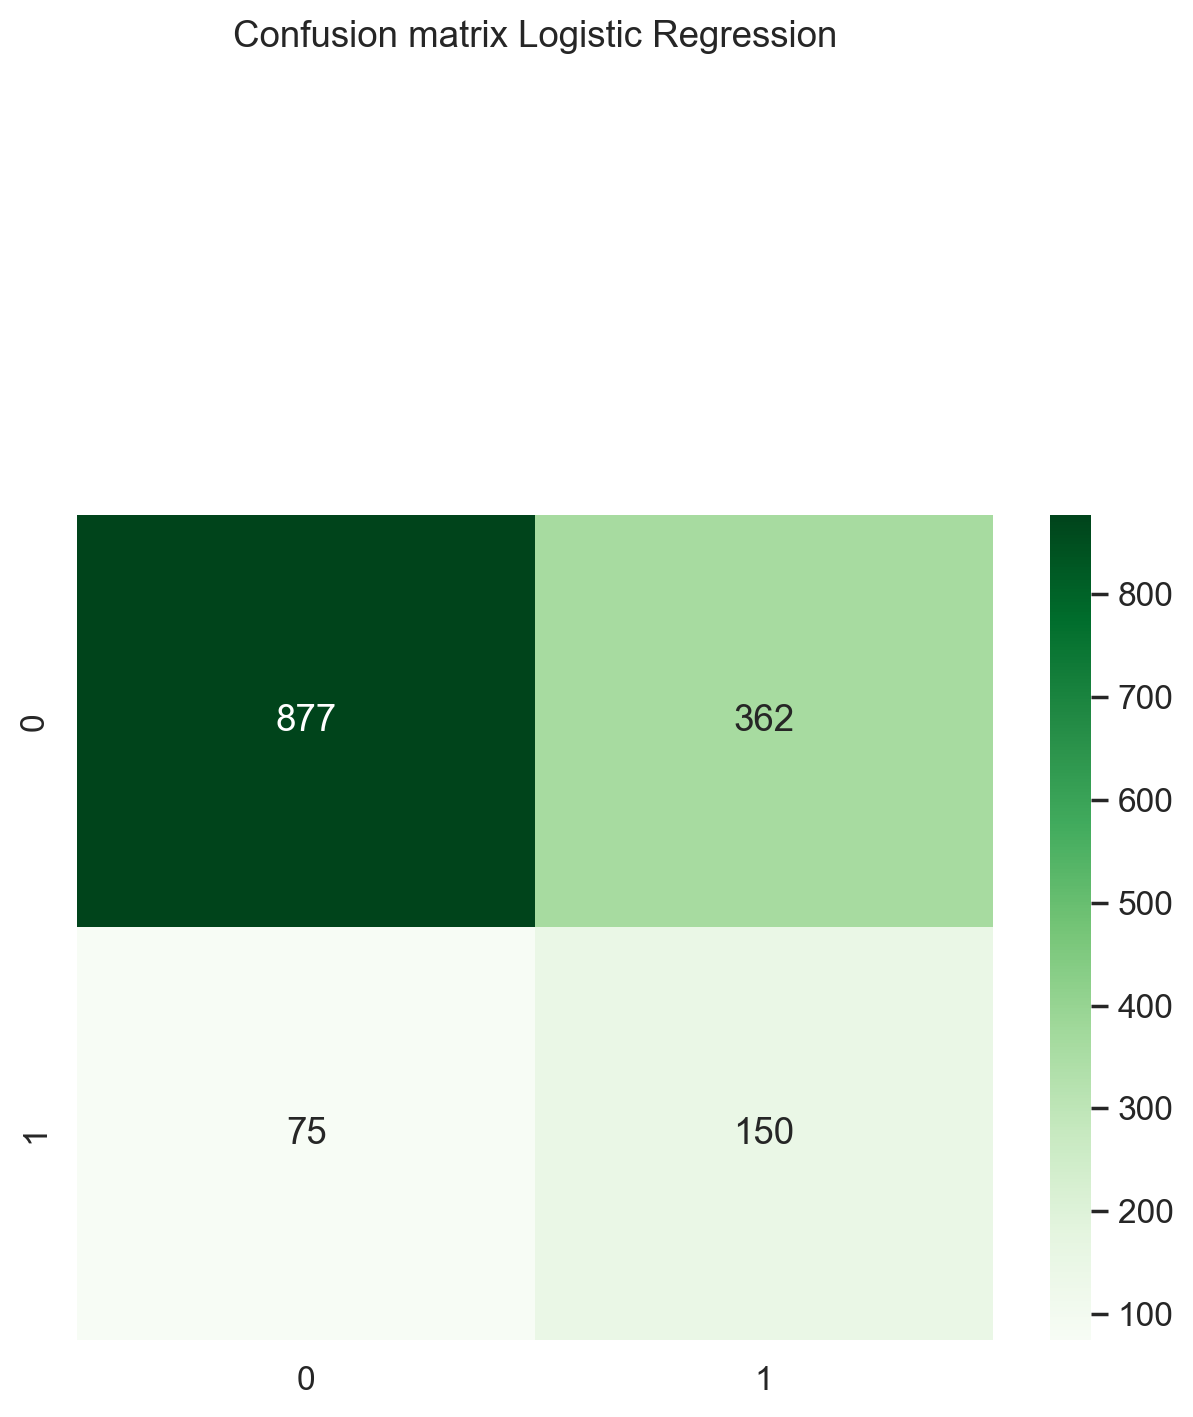

In [66]:
# plotting confusion matrix LogReg

cnf_matrix_log = confusion_matrix(y_test, normalized_df_reg_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Greens" , fmt='g')

plt.tight_layout()
plt.title('Confusion matrix Logistic Regression\n', y=1.5)
plt.show()

## SVM

In [67]:
# Support Vector Machine

#initialize model
svm = SVC()

#fit model
svm.fit(X_train, y_train)

normalized_df_svm_pred = svm.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_svm_pred)
print(f"The accuracy score for SVM is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_svm_pred)
print(f"The f1 score for SVM is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_svm_pred)
print(f"The precision score for SVM is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_svm_pred)
print(f"The recall score for SVM is: {round(recall,3)*100}%")

SVC()

The accuracy score for SVM is: 69.3%
The f1 score for SVM is: 39.7%
The precision score for SVM is: 28.499999999999996%
The recall score for SVM is: 65.8%


<AxesSubplot:>

Text(0.5, 1, 'Confusion matrix SVM\n')

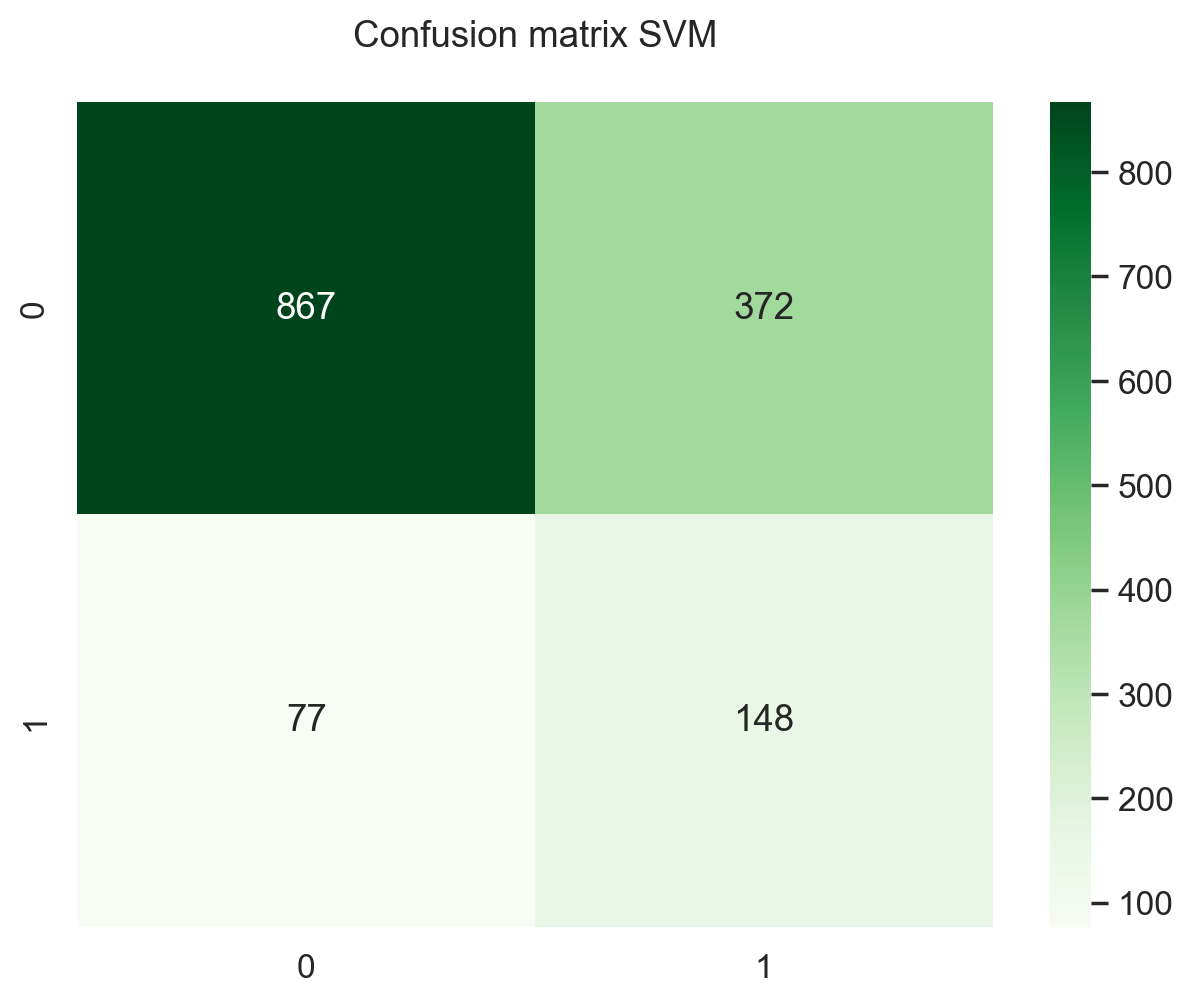

In [73]:
# plotting confusion matrix SVM

cnf_matrix_svm = confusion_matrix(y_test, normalized_df_svm_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True,cmap="Greens",fmt='g')
plt.tight_layout()
plt.title('Confusion matrix SVM\n', y=1)
plt.show()

## Decission Tree

In [70]:
# Decision Tree

#initialize model
dtc_up = DecisionTreeClassifier()

# fit model
dtc_up.fit(X_train, y_train)

normalized_df_dtc_pred = dtc_up.predict(X_test)

# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_dtc_pred)
print(f"The accuracy score for DTC is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_dtc_pred)
print(f"The f1 score for DTC is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_dtc_pred)
print(f"The precision score for DTC is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_dtc_pred)
print(f"The recall score for DTC is: {round(recall,3)*100}%")

DecisionTreeClassifier()

The accuracy score for DTC is: 71.1%
The f1 score for DTC is: 51.5%
The precision score for DTC is: 34.699999999999996%
The recall score for DTC is: 100.0%


<AxesSubplot:>

Text(0.5, 1, 'Confusion matrix Decision Tree\n')

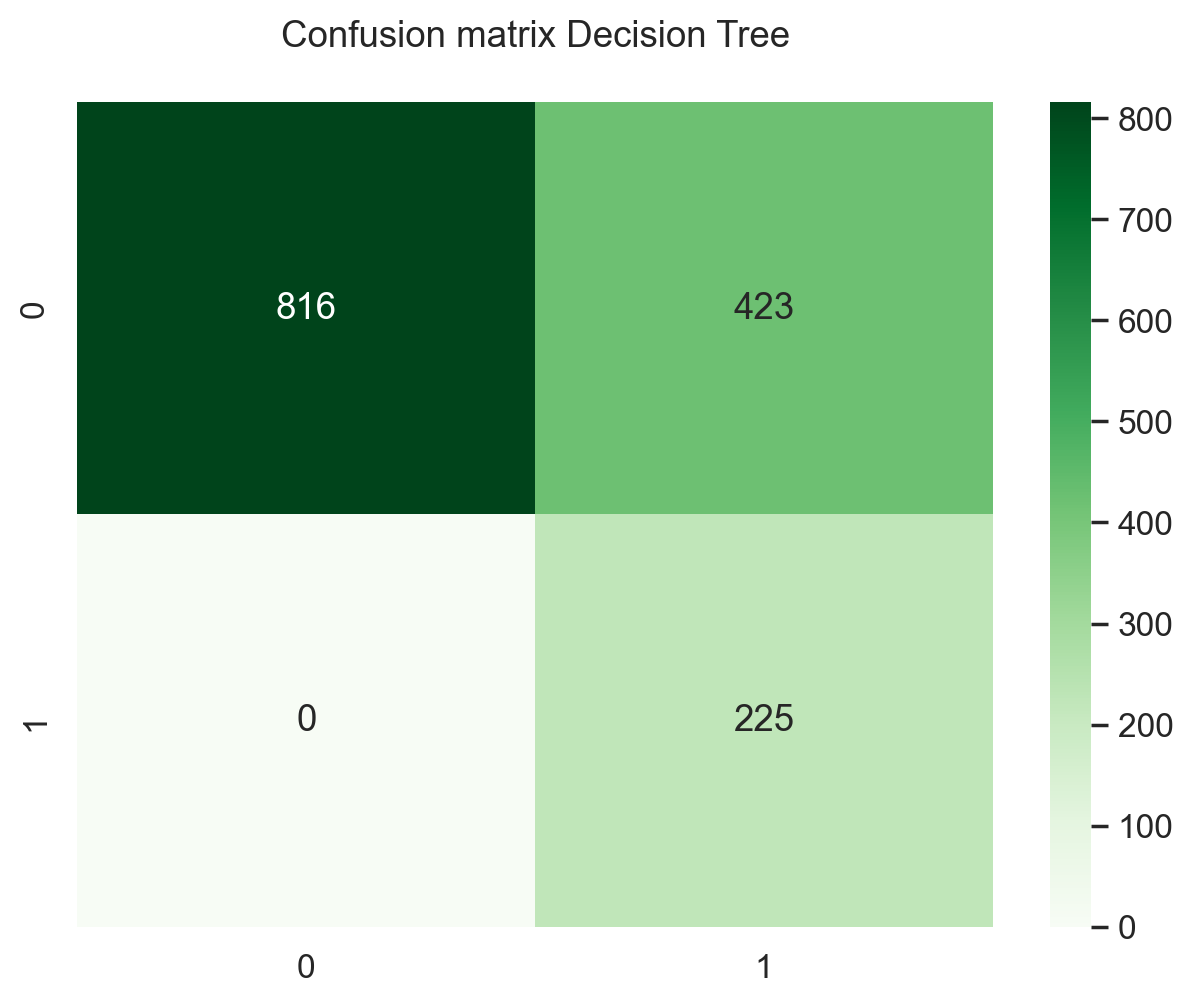

In [74]:
# plotting confusion matrix Decision Tree

cnf_matrix_dtc = confusion_matrix(y_test, normalized_df_dtc_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True,cmap="Greens" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix Decision Tree\n', y=1)
plt.show()

## KNN

In [76]:
#initialize model
knn = KNeighborsClassifier(n_neighbors = 2)

#fit model
knn.fit(X_train, y_train)

# prediction = knn.predict(x_test)
normalized_df_knn_pred = knn.predict(X_test)


# check accuracy: Accuracy: Overall, how often is the classifier correct? Accuracy = (True Pos + True Negative)/total
acc = accuracy_score(y_test, normalized_df_knn_pred)
print(f"The accuracy score for KNN is: {round(acc,3)*100}%")

# f1 score: The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
f1 = f1_score(y_test, normalized_df_knn_pred)
print(f"The f1 score for KNN is: {round(f1,3)*100}%")

# Precision score: When it predicts yes, how often is it correct? Precision=True Positive/predicted yes
precision = precision_score(y_test, normalized_df_knn_pred)
print(f"The precision score for KNN is: {round(precision,3)*100}%")

# recall score: True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes? True Positive Rate = True Positive/actual yes
recall = recall_score(y_test, normalized_df_knn_pred)
print(f"The recall score for KNN is: {round(recall,3)*100}%")

KNeighborsClassifier(n_neighbors=2)

The accuracy score for KNN is: 80.10000000000001%
The f1 score for KNN is: 47.3%
The precision score for KNN is: 39.800000000000004%
The recall score for KNN is: 58.199999999999996%


<AxesSubplot:>

Text(0.5, 1, 'Confusion matrix KNN\n')

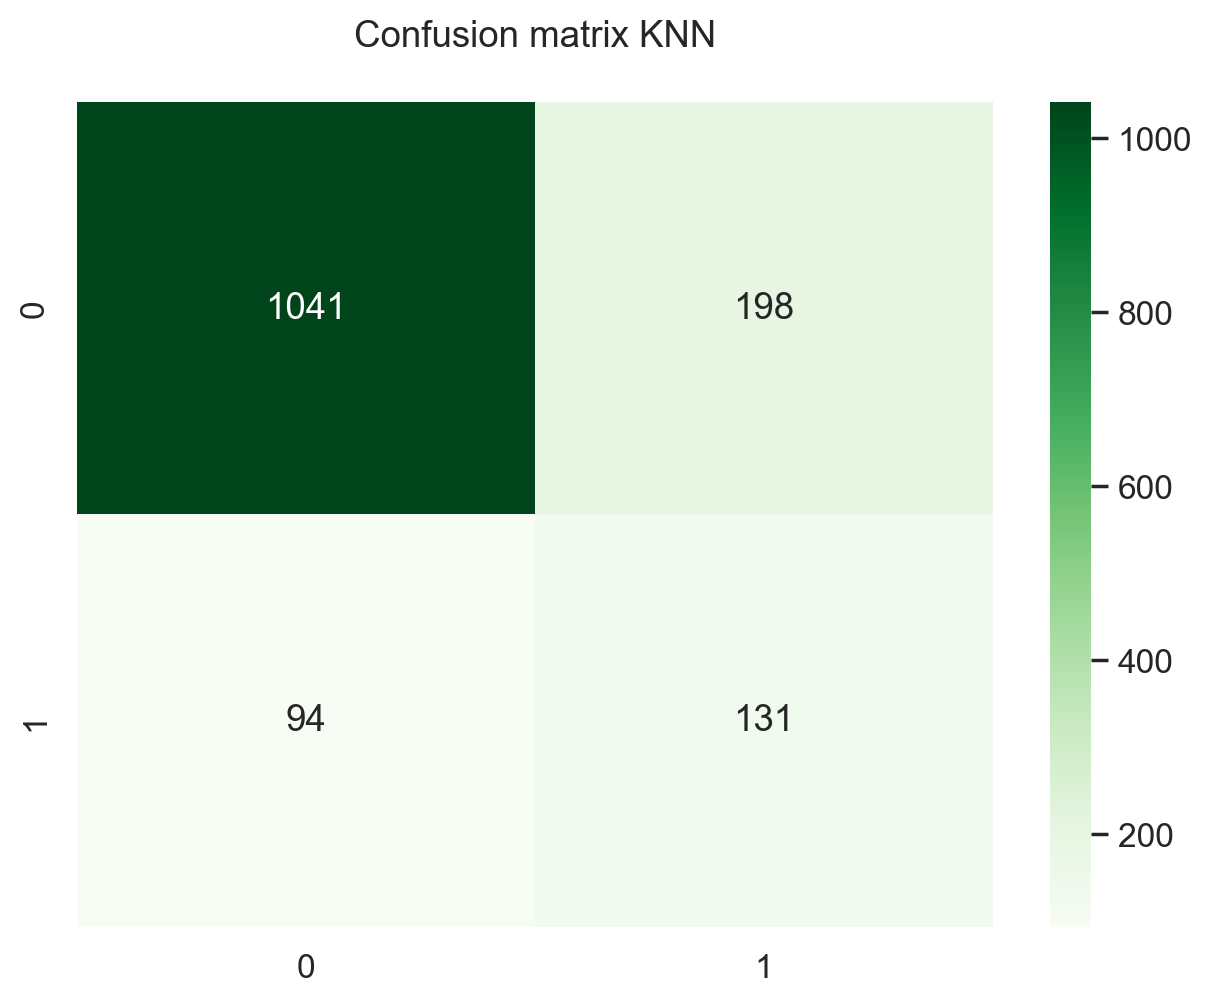

In [78]:
# plotting confusion matrix KNN

cnf_matrix_knn = confusion_matrix(y_test, normalized_df_knn_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True,cmap="Greens" , fmt='g')
plt.tight_layout()
plt.title('Confusion matrix KNN\n', y=1)
plt.show()

## Result : The KNN model has highest accuracy score

In [79]:
# Check overfit of the KNN model
# accuracy test and train
acc_test = knn.score(X_test, y_test)
print("The accuracy score of the test data is: ",acc_test*100,"%")
acc_train = knn.score(X_train, y_train)
print("The accuracy score of the training data is: ",round(acc_train*100,2),"%")

The accuracy score of the test data is:  80.05464480874316 %
The accuracy score of the training data is:  79.11 %


The score of training and testing data for KNN are similar, therefore we don't expect the model to overfit.


